![Logo_Seattle](Seattle_logo.jpg)

# **Projet 4 - <span style="color:#1d479b">Anticipez les besoins en consommation de bâtiments</span>**
---

**<span style="color:#1d479b">Objectif de la mission:</span>**
* Tenter de **prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation** pour lesquels elles n’ont pas encore été mesurées.
* **Evaluer l’intérêt de l’"ENERGY STAR Score"** pour la prédiction d’émissions.

**<span style="color:#1d479b">Source des données:</span>**

Les données sont issues du <a href="https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy">site gouvernemental de la ville de Seattle</a> et sont mises à disposition afin d'effectuer une "Analyse comparative énergétique des bâtiments 2016". Les métadonnées sont disponibles sur cette même page.

**Détails contextuels:**
> Le programme d'analyse comparative et de reporting énergétique des bâtiments de Seattle (SMC 22.920) exige que les propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) suivent la performance énergétique et fassent rapport annuellement à la ville de Seattle. Les bâtiments représentent 33 % des principales émissions de Seattle. La politique d'analyse comparative soutient les objectifs de Seattle visant à réduire la consommation d'énergie et les émissions de gaz à effet de serre des bâtiments existants. En 2013, la ville de Seattle a adopté un plan d'action climatique visant à atteindre zéro émission nette de gaz à effet de serre (GES) d'ici 2050. L'analyse comparative annuelle, les rapports et la divulgation des performances des bâtiments sont des éléments fondamentaux pour créer davantage de valeur marchande pour l'efficacité énergétique.

---

**<span style="color:#1d479b">Objectif du notebook:</span>** Réaliser une EDA en vue d'obtenir un jeu de données contenant des informations pertinentes pour répondre aux objectifs de la mission.

**Notebook EDA:**
1. **Description des données**
      * Identifier les target: 
         * `SiteEnergyUseWN(kBtu)`
         * `TotalGHGEmissions`
      * Nombre de ligne et de colonnes: 
         * `(3376, 46)`
      * Types de variables: 
         * `Qualitatives: 16`
         * `Quantitatives: 30`
      * Identification des valeurs manquantes: 
        * `12,8% de données manquantes au totale, dont 3 variables avec plus de 95% de valeurs manquantes et 5 autres entre 24 et 83%`
2. **Nettoyage des données**
   1. *Suppression des données inexploitables*
   2. *Sélection des données pertinentes pour la mission*
   3. *Traitement des données*
3. **Analyse des données**
   1. *Visualisation des targets*
      1. `SiteEnergyUseWN(kBtu)`: Les données sont fortement concentrées autour de 0.
         1. Mean: 7847870.09.
         2. Skewness: 9.45 (indique une distribution fortement étalée à droite).
      2. `TotalGHGEmissions`: Skewed (asymétriques).
         1. Mean: 167.72.
         2. Skewness: 13.79 (indique une distribution fortement étalée à droite).
      3. `Information complémentaire: L'application d'une fonction logarithmique permet d'obtenir une distribution normale et d'identifier des valeurs anormales (val = 0 ou 0 < val) pour les 2 caractéristiques cibles.`
         
   2. *Visualisation des features*
      1. `Neighborhood`: Contient des doublons générés via la différence de casse entre les valeurs.
      2. `PropertyGFAParking`,`SecondLargestPropertyUseTypeGFA`,`ThirdLargestPropertyUseTypeGFA`: L'application de la fonction logarithmique dimunie bien la variance mais **les valeurs = 0 impacte considérablement les mesures de formes pour ces 3 variables**.
      3. `NumberofFloors`: L'immeuble référencé avec près de 100 étages est un outlier, le plus grands immeuble de Seattle possède "seulement" 76 étages (Wikipédia). Vigilance également sur la présence de valeurs = 0.
      4. `PropNaturalGas(%)`: Contient une valeur négative, c'est une valeur aberrante puisqu'une proportion entre 2 valeurs ne peut être < 0.
      5. `NumberofBuildings`: Contient plusieurs valeurs = 0, ce qui semble être des valeurs atypiques puisque que chaque individu devrait posséder au minimum 1 bâtiment, hormis les parkings.
   
   3. *Visualisation des relations features-target*
      1. `Refrigerateur Warehouse`, `Swimming Pool`, `Laboratory`, `Other-Recreation`, `Hotel`, `Hospital` sont les bâtiments les plus énergivores.
      2. `Swimming Pool`, `Other-Recreation` sont les plus gros émetteurs de CO2.
      3. `4/5 individus isolés` (outliers?) sont identifiés lors de l'observation de la relation entre les variables de types `float`/`int` et les targets.
      4. Tester un `groupeby("Neighborhood").mediane()` avec les targets pour observer l'effet et le résultat sur les prédictions.

   4. *Analyse des corrélations*
      1. `ENERGYSTARScore`, `PropElectricity(%)`, `PropNaturalGas(%)` sont très faiblement corrélés tout comme `YearBuilt` dans une moindre mesure.
   
4. **Imputation des données manquantes (nutriments)**
   1. *Imputation de la moyenne globale*
   2. *Imputation de la moyenne par catégorie (pnns_groups_2)*
   3. *Imputation via le KNN-Imputer*
   4. *Imputation du nutrition_grade_fr*
5. *Conclusion*


   * Analyse de fond
      * Visulation de la target (histo/boxplot)
      * Compréhension des différentes variables
      * Visualisation des relations features-target
      * Identification des outliers
1. Pre-Processing
   objectif: tranformer le data set pour le mettre dans un format propice au ML
   
   CHECKLIST:
   * création du Train set / Test set
   * elimination des NaN
   * Encodage
   * supression des outliers néfastes au modèle
   * feature selection
   * feature engineering
   * feature scaling
2. Modelling
   objectif: développer un modèle de ML
   
   CHECKLIST:
   * définir une fonction d'évaluation
   * entrainement de différents modèles
   * optimisation avec gridsearchcv
   * analyse des erreurs et retour au Preprocessing/EDA
   * learning curve et prise de décision

## **0. Importation des librairies et des données**
---

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd

In [2]:
# Import dataset
data_brut = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Benchmarking.csv"
data = pd.read_csv(data_brut, sep=",", low_memory=False)
# Copy dataset
df = data.copy()
# df2 = data.copy()
# df4 = data.copy()

### **0.1 - Définition de la charte graphique**

In [3]:
["#00317a","#1d479b","#FFF","#F1F1F1","#333","#000"]

['#00317a', '#1d479b', '#FFF', '#F1F1F1', '#333', '#000']

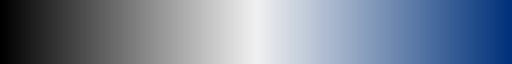

In [4]:
# Define the heatmap color
first_color = "#000"
under_color = "#F1F1F1"
over_color = "#00317a"
# Create a personal color map 
colors = [first_color,under_color, over_color]
n_bins = 200
cmap_name = 'custom_colormap'
heatmap_color = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
heatmap_color

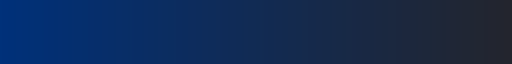

In [5]:
palette_b = sns.dark_palette("#00317a", reverse=True, as_cmap=True)
palette_b

In [6]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#00317a", n_colors=len(df),as_cmap=False)
palette_map

[(0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.184415261533432

### **0.2 - Normalisation des graphiques**

In [7]:
# Defines display options for rows and columns
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',60)

In [8]:
plt.rcParams['axes.titlesize'] = 16  # Taille du titre
plt.rcParams['axes.titlecolor'] = '#000'  # Couleur du titre
plt.rcParams['axes.titlepad'] = 20  # Couleur du titre

plt.rcParams['axes.labelsize'] = 10  # Taille des labels des axes
plt.rcParams['axes.labelcolor'] = '#000'  # Couleur des labels des axes

plt.rcParams['xtick.labelsize'] = 8  # Taille des labels des ticks x
plt.rcParams['ytick.labelsize'] = 8  # Taille des labels des ticks y
plt.rcParams['xtick.color'] = '#333'  # Couleur des labels des ticks x
plt.rcParams['ytick.color'] = '#333'  # Couleur des labels des ticks y

In [9]:
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2,
              rc={"axes.titlesize":16, 
                  "axes.labelsize":10, 
                  "xtick.labelsize":8, 
                  "ytick.labelsize":8, 
                  "xtick.color":"#333", 
                  "ytick.color":"#333", 
                  "axes.titlecolor":"#000", 
                  "axes.labelcolor":"#000"
                  })

## **1. Description des données**
***

In [10]:
# Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [11]:
# View random data
df.sample(3)

OSEBuildingID  DataYear          BuildingType  \
2573          26135      2016  Multifamily LR (1-4)   
915           20223      2016  Multifamily LR (1-4)   
2406          25543      2016        NonResidential   

              PrimaryPropertyType              PropertyName  \
2573         Low-Rise Multifamily      Union Bay Condos-480   
915          Low-Rise Multifamily  White Heather Apartments   
2406  Small- and Mid-Sized Office       Gatzert/Schwabacher   

                Address     City State  ZipCode TaxParcelIdentificationNumber  \
2573   762 Hayes Street  Seattle    WA  98109.0                    8805100000   
915   12556 15th Ave NE  Seattle    WA  98125.0                    1133000220   
2406        103 1st Ave  Seattle    WA  98104.0                    5247800046   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
2573                    7  MAGNOLIA / QUEEN ANNE  47.63434 -122.34140   
915                     5                  NORTH  47.72098 -122.31228   
2406                    7               DOWNTOWN  47.60149 -122.33458   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2573       1977                1.0               4             31008   
915        1965                1.0               3             21469   
2406       1900                1.0               4             42804   

      PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
2573                   0                   31008       Multifamily Housing   
915                    0                   21469       Multifamily Housing   
2406                   0                   42804      Office, Retail Store   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
2573    Multifamily Housing                    24282.0   
915     Multifamily Housing                    21469.0   
2406                 Office                    24120.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
2573                          NaN                              NaN   
915                           NaN                              NaN   
2406                 Retail Store                           6583.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
2573                         NaN                             NaN   
915                          NaN                             NaN   
2406                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2573                      NaN             24.0         49.700001   
915                       NaN             77.0         23.799999   
2406                      NaN              NaN         50.299999   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
2573           53.900002          112.199997            118.800003   
915            25.100000           74.699997             78.900002   
2406           52.000000          105.199997            110.699997   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
2573          1207869.875            1308208.750             0.0   
915            510528.500             539732.375             0.0   
2406          1544501.750            1598032.000             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
2573       204079.9063           696321.0         5115.490234   
915        149627.2969           510528.0            0.000000   
2406       225503.0938           769417.0         7750.851074   

      NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
2573          511549.0        False       NaN        Compliant     NaN   
915                0.0        False       NaN        Compliant     NaN   
2406          775085.0        False       NaN        Compliant     NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  
2573              32.02                   1.03  
915                3.56                   

In [12]:
# Counts the number of columns per data type
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

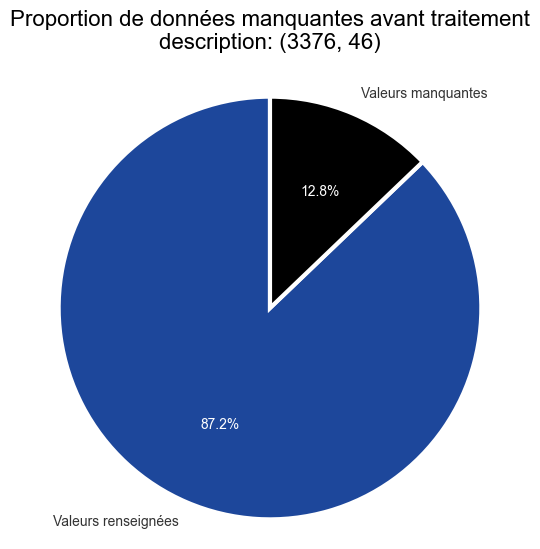

In [13]:
# Calculation of the average percentage of missing values
missing_percentage = df.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Valeurs renseignées", "Valeurs manquantes"]
# Define color code
colors = ["#1d479b",'#000']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title(f"Proportion de données manquantes avant traitement\ndescription: {df.shape}")
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#333", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

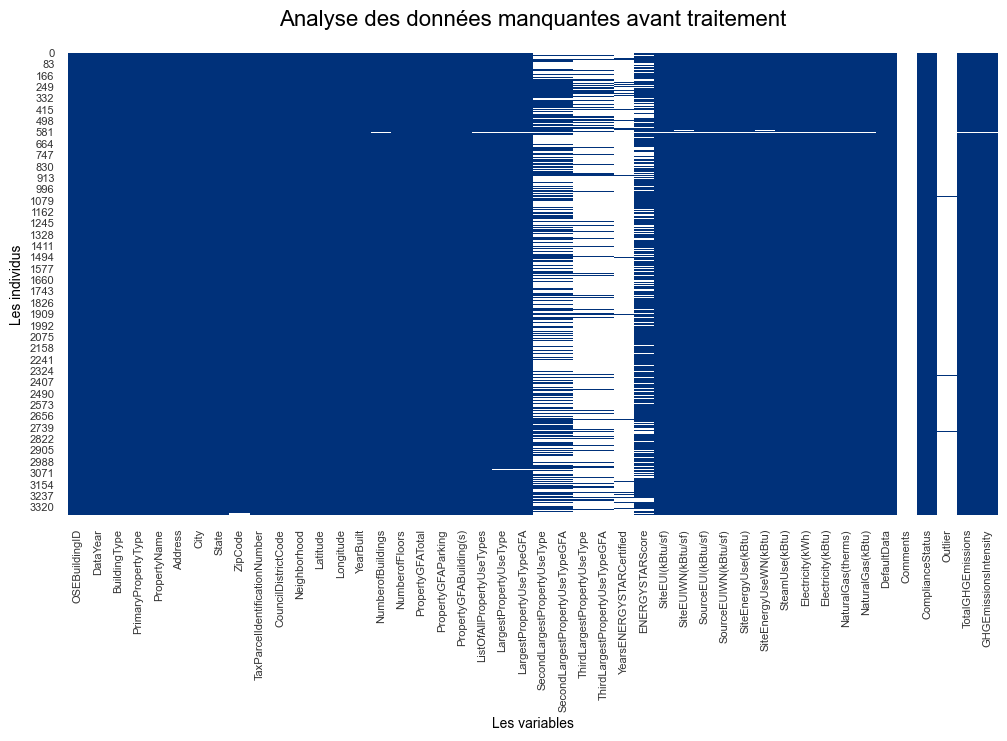

In [14]:
cmap = ["#00317a","#000","#333","#F1F1F1", "#FFF"]
plt.figure(figsize=(12,6))
ax = sns.heatmap(df.isna(), cbar=False, cmap=cmap)
# Set title on pie chart
plt.title(f"Analyse des données manquantes avant traitement",pad=20,color="#000",fontsize=16)
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Les variables",color='#000', fontsize=10)
plt.ylabel("Les individus",color='#000', fontsize=10)
plt.show()

In [15]:
# Missing values per column
(df.isna().mean().sort_values(ascending=False)*100).head(10)

Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseType        50.266588
SecondLargestPropertyUseTypeGFA     50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
dtype: float64

## **2. Nettoyage des données**
***

Il s'agit de **supprimer les variables qui ne peuvent être exploitées** et de **sélectionner les plus pertinentes** pour la suite de la mission.

### **1. Suppression des données inexploitables**

La colonne `Comments` peut d'ores et déjà être supprimée puisqu'elle ne **contient aucune données**. Ensuite, la colonne `Outlier` contient peu de données mais celles-ci permettent d'**identifier les individus qui ont des valeurs abérrantes**. Ces données sont donc isolées dans un premier temps puis supprimées car elles pourraient être sources de biais dans la construction du modèle.

In [16]:
# Delete columns containing only null values
df.dropna(axis=1, how="all", inplace=True)

In [17]:
# Instanciation des outliers
df_outliers = df.loc[df["Outlier"].notnull()]

In [18]:
# Selection of data without outliers
df = df[df["Outlier"].isnull()]

La colonne `YearsENERGYSTARCertified` contient également peu de données et n'est pas pertinente pour la construction du modèle, elle est donc supprimée du data set.

In [19]:
# Instanciation des colonnes ayant un taux de données manquantes trop élevée
null_columns = ["YearsENERGYSTARCertified","Outlier"]
# Deleting columns
df = df.drop(columns=null_columns)

Il reste donc 4 variables qui fournissent peu d'information au vu de la quantité de données qu'elles contiennent:
* `SecondLargestPropertyUseType` et `SecondLargestPropertyUseTypeGFA`
* `ThirdLargestPropertyUseType` et `ThirdLargestPropertyUseTypeGFA`

Ces variables informent sur le 2ème et 3ème type d'utilisation des bâtiments ainsi que sur la surface brut de plancher (GFA). Ces données sont pertinentes pour la suite de notre projet mais trop peu renseignées, elles sont tout de même conservées pour le moment.

In [20]:
# Instantiation of columns for other types of use
other_property_use = ["SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA",
                      "ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA"]

### **2. Sélection des données pertinentes pour la mission**

Le but étant la **prédiction des émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation**, seule les variables pertinentes à ce calcul sont conservées.

Ainsi, les bâtiments non destinés à l'habitation sont conservés.

In [21]:
# Selection of non-residential buildings
df = df.loc[df["BuildingType"].str.lower().str.contains("nonresidential"),:]

Les individus ont **43 caractéristiques** dans ce data set mais elles ne sont pas toutes pertinentes, certaines founissent une information en double et d'autres sont inutiles.

Pour les variables **qualitatives**:
* `DataYear`, `BuildingType`, `City`, `State`: Contiennent une information commune à l'ensemble des individus et donc sont une caractéristique globale du data set;
* `OSEBuildingID`, `PropertyName`, `ZipCode`, `TaxParcelIdentificationNumber`: Contiennent des informations qualitatives non-pertinentes pour l'objectifs du modèle de prédiction;
* `Address`,`CouncilDistrictCode`: Sont les doublons respectifs des variables `Latitude`/`Longitude` et de `Neighborhood`.

Ces caractéristiques sont donc supprimées du data set.

Pour les **quantitatives**, il est plus pertinent d'évoquer les **variables indispensables au projet**:
* `SiteEnergyUseWN(kBtu)`, `TotalGHGEmissions`: Les targets bien entendue;
* `ENERGYSTARScore`: Etude de l'importance de cette caractéristique dans la prédiction d'émission de CO2;
* `LargestPropertyUseTypeGFA`, `SecondLargestPropertyUseTypeGFA`, `ThirdLargestPropertyUseTypeGFA`: Surface brut de plancher (GFA) pour les 3ère utilisations les plus importantes de la propriété.
* `Electricity(kBtu)`, `NaturalGas(kBtu)`: Données de consommation d'énergie normalisées;
* `DefaultData`, `ComplianceStatus`: Informations supplémentaires sur les données.

Cette fois, ces données sont conservées et les données quantitatives restantes sont supprimées.

In [22]:
# Instantiation of columns to be deleted
qualitative_columns = ["OSEBuildingID","DataYear","BuildingType","PrimaryPropertyType","PropertyName","Address",
                       "City","State","ZipCode","TaxParcelIdentificationNumber","CouncilDistrictCode","ListOfAllPropertyUseTypes"]
quantitative_columns = ["SiteEUI(kBtu/sf)","SiteEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)","SourceEUIWN(kBtu/sf)",
                        "SiteEnergyUse(kBtu)","SteamUse(kBtu)","Electricity(kWh)","NaturalGas(therms)","GHGEmissionsIntensity"]
# Deleting columns
df = df.drop(columns=qualitative_columns + quantitative_columns)

### **3. Traitement des données**

Maintenant que les caractéristiques pertinentes sont sélectionnées, il est nécessaire de faire un **premier niveau de traitement** sur les données.

La première étape consiste à **analyser les variables**:
* `DefaultData`: Informe sur l'utilisation de données par défaut pour au moins une caractéristique du bien;
* `ComplianceStatus`: Indique si le bien immobilier satisfait les exigences de l'analyse comparative de la consommation d'énergie.

In [23]:
# Display data
print(df["DefaultData"].value_counts(),"\n\n", df["ComplianceStatus"].value_counts())

DefaultData
False    1518
True       12
Name: count, dtype: int64 

 ComplianceStatus
Compliant                       1514
Error - Correct Default Data      12
Non-Compliant                      3
Missing Data                       1
Name: count, dtype: int64


L'analyse montre la présence de données non conformes à la loi sur certains individus ainsi que des données par défauts; ces informations sont suceptibles de biaiser le modèle de prédiction. Seul **les individus qui ont des valeurs réelles et conforment à la loi sont conservés**.

In [24]:
# Selects individuals who comply with the law
df = df.loc[(df["ComplianceStatus"] == "Compliant") & (df["DefaultData"] == False)]

**Rappel d'OBJECTIF -> Se passer des relevés de consommation annuels futurs !**

Afin de respecter cette consigne, il est nécessaire d'**exclure les variables** `Electricity(kBtu)`	et `NaturalGas(kBtu)`. Cependant, il a également été mentionné qu'il est possible d'en *"déduire des variables structurelles aux bâtiments, par exemple la nature et proportions des sources d’énergie utilisées"*.

A ce titre, 2 colonnes sont créées et font références à la proportion de consommation de gaz (`PropNaturalGas(%)`) et d'électricité (`PropElectricity(%)`).

In [25]:
# Adding gas and electricity proportions
df["PropElectricity(%)"] = np.where(df["SiteEnergyUseWN(kBtu)"] != 0, round(df["Electricity(kBtu)"]/df["SiteEnergyUseWN(kBtu)"]*100,2), 0)
df["PropNaturalGas(%)"] = np.where(df["SiteEnergyUseWN(kBtu)"] != 0, round(df["NaturalGas(kBtu)"]/df["SiteEnergyUseWN(kBtu)"]*100,2), 0)

Les colonnes précédemment traitées peuvent maintenant être supprimées.

In [26]:
# Instantiation of processed columns
Processed_columns = ["Electricity(kBtu)","NaturalGas(kBtu)","DefaultData","ComplianceStatus"]
# Deleting columns
df = df.drop(columns=Processed_columns)

Enfin, il est nécessaire de **s'assurer que les individus aient le minimum d'informations** requises pour obtenir de bonnes prédictions.

Pour cela, il est **indispensable d'avoir des données pour les caractéristiques suivantes**: 
* `SiteEnergyUseWN(kBtu)` (target): Tout individus n'ayant pas de données sur cette caractéristique doit être supprimés;
* `TotalGHGEmissions` (target): De même pour cette caractéristique;
* `LargestPropertyUseType`/`LargestPropertyUseTypeGFA`: Il est également indispensable d'avoir l'information sur le plus grand type d'utilisation du bâtiment, sans cette information il n'est pas possible d'obtenir une bonne prédiction.

Vérification des valeur manquantes.

In [27]:
# Display the null values
df.isna().mean().sort_values(ascending=False)

ThirdLargestPropertyUseTypeGFA     0.775429
ThirdLargestPropertyUseType        0.775429
SecondLargestPropertyUseTypeGFA    0.452444
SecondLargestPropertyUseType       0.452444
ENERGYSTARScore                    0.350066
LargestPropertyUseTypeGFA          0.002642
LargestPropertyUseType             0.002642
PropElectricity(%)                 0.000661
SiteEnergyUseWN(kBtu)              0.000661
PropNaturalGas(%)                  0.000661
Latitude                           0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
NumberofBuildings                  0.000000
YearBuilt                          0.000000
TotalGHGEmissions                  0.000000
Longitude                          0.000000
Neighborhood                       0.000000
dtype: float64

Les individus n'ayant pas de valeurs pour les caractéristiques mentionnées ci-dessus sont maintenant supprimés.

In [28]:
# Instantiation of columns that must not contain null values
columns_without_nulls = ["LargestPropertyUseType","LargestPropertyUseTypeGFA","SiteEnergyUseWN(kBtu)","TotalGHGEmissions"]
# Deleting columns
df = df.dropna(subset=columns_without_nulls)

Pour terminer, le types de la colonne `NumberofBuildings` est modifié en `int` afin de mieux correspondre aux données et les colonnes `...GFA` sont transformées en `float`.

In [29]:
# Data type update
df["NumberofBuildings"] = df["NumberofBuildings"].astype(int)
df[["PropertyGFATotal","PropertyGFAParking","PropertyGFABuilding(s)"]] = df[["PropertyGFATotal","PropertyGFAParking","PropertyGFABuilding(s)"]].astype(float)

In [30]:
# Copy of cleaned data set
df_clean = df.copy()

## **3. Analyse des données**
***

Les données sont analysées afin d'en tirer un maximum d'information et d'identifier les potentielles anomalies.

### **1. Analyse des targets**

Analyse de la distribution des variables cibles `SiteEnergyUseWN(kBtu)` et `TotalGHGEmissions`.

SiteEnergyUseWN(kBtu):
Mean:7847870.09
Skewness:9.45
Kurtosis:121.91

TotalGHGEmissions:
Mean:167.72
Skewness:13.79
Kurtosis:240.79



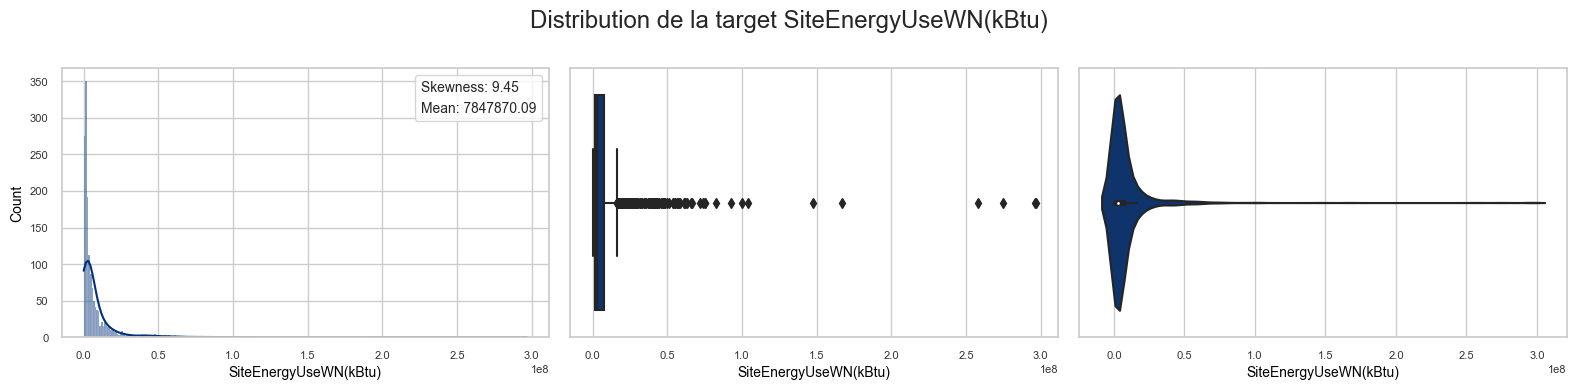

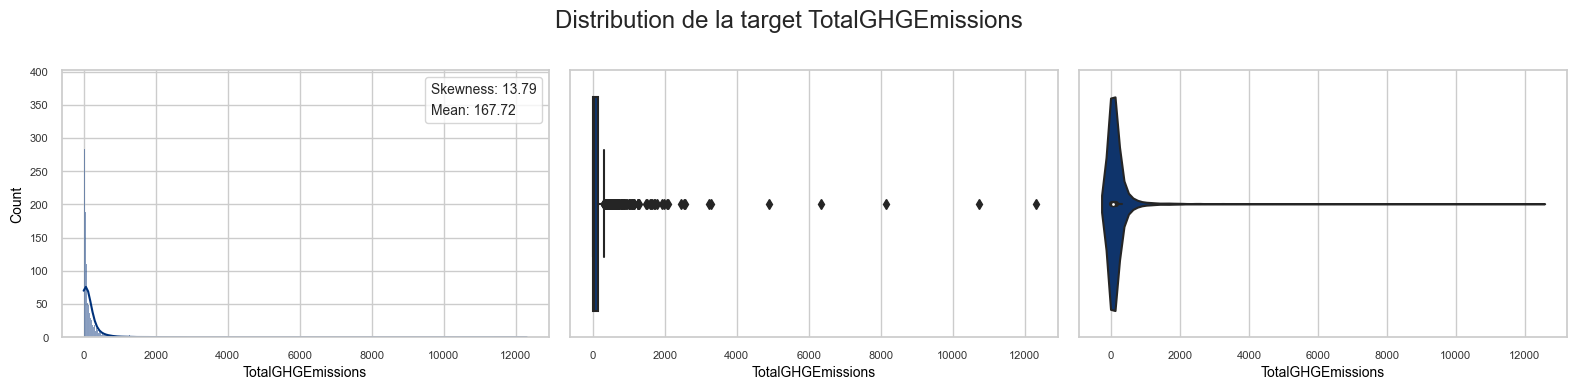

In [31]:
# Column instantiation
targets = ["SiteEnergyUseWN(kBtu)","TotalGHGEmissions"]

# Generates graphs by variable
for col in targets:
    fig, axs = plt.subplots(1, 3, figsize=(16,4))
    
    # Calculate mean and skewness
    mean = round(df_clean[col].mean(), 2)
    skewness = round(df_clean[col].skew(), 2)
    kurtosis = round(df_clean[col].kurtosis(), 2)
    print(f"{col}:\nMean:{mean}\nSkewness:{skewness}\nKurtosis:{kurtosis}\n")

    # Display histogram
    sns.histplot(data=df_clean, x=col, kde="kind", color="#00317a", ax=axs[0])    
    # Add skewness and average to legend
    axs[0].legend([f"Skewness: {skewness}", f"Mean: {mean}"], fontsize="10", handlelength=0, handletextpad=0)
    # Create a boxplot
    sns.boxplot(data=df_clean, x=col, orient="h", color="#00317a", ax=axs[1])
    # Create a violinplot
    sns.violinplot(data=df_clean, x=col, orient="h", color="#00317a", ax=axs[2])
    
    # Add a unique title for each target
    plt.suptitle(f"Distribution de la target {col}")
    plt.tight_layout()

Comme le démontre la mesure de forme `Skewness` pour les 2 variables cibles, la distribution est étalée à droite. L'observation des graphiques confirme les résulats et montre une **forte concentration des données autour de 0**.

Il est intéressant d'observer la **distribution des données après l'application d'une fonction logarithmique**.

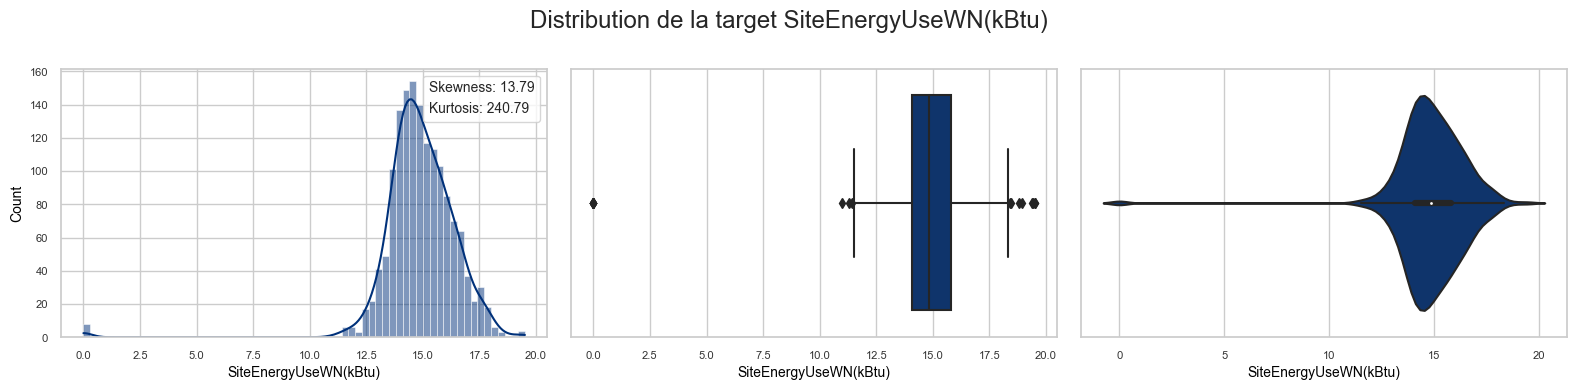

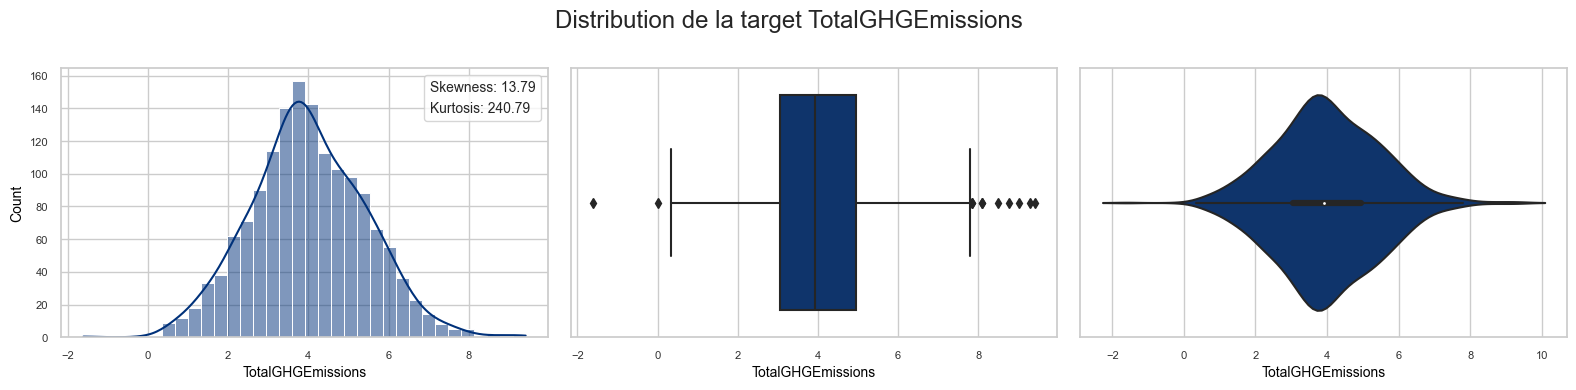

In [32]:
# Column instantiation
targets = ["SiteEnergyUseWN(kBtu)","TotalGHGEmissions"]

# Generates graphs by variable
for col in targets:
    fig, axs = plt.subplots(1, 3, figsize=(16,4))

    # Display histogram
    sns.histplot(data=df_clean, x=np.log1p(df_clean[col]), kde="kind", color="#00317a", ax=axs[0])    
    # Add skewness and average to legend
    axs[0].legend([f"Skewness: {skewness}", f"Kurtosis: {kurtosis}"], fontsize="10", handlelength=0, handletextpad=0)
    # Create a boxplot
    sns.boxplot(data=df_clean, x=np.log1p(df_clean[col]), orient="h", color="#00317a", ax=axs[1])
    # Create a violinplot
    sns.violinplot(data=df_clean, x=np.log1p(df_clean[col]), orient="h", color="#00317a", ax=axs[2])
    
    # Add a unique title for each target
    plt.suptitle(f"Distribution de la target {col}")
    plt.tight_layout()

L'application du logarithme permet de mettre en avant des valeurs aberrantes:
* `SiteEnergyUseWN(kBtu)`: La présence de valeurs = 0 interpelle puisqu'il est peu probable qu'un bâtiment ne consomme pas d'énergie;
* `TotalGHGEmissions`: Ici, la présence de valeurs = 0 est également peu probable. La présence d'une valeur négative est encore moins probable et sera considérée comme valeur aberrante.
  
Ces données sont suceptibles de perturber les résultats de prédiction. Cela sera vérifié lors de la mise en place du modèle, notamment durant la phase de pré-processing. En attendant, les données sont observées.

In [33]:
# Displays data 
df_clean.loc[df_clean["TotalGHGEmissions"] <= 0]

Neighborhood  Latitude  Longitude  YearBuilt  \
513   MAGNOLIA / QUEEN ANNE  47.63718 -122.37734       2008   
3206                CENTRAL  47.61432 -122.31257       2013   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
513                   1               1           57176.0                 0.0   
3206                  1               6           52000.0                 0.0   

      PropertyGFABuilding(s)     LargestPropertyUseType  \
513                  57176.0  Supermarket/Grocery Store   
3206                 52000.0                     Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
513                     39500.0                 Retail Store   
3206                    48159.0                          NaN   

      SecondLargestPropertyUseTypeGFA  \
513                           15000.0   
3206                              NaN   

                            ThirdLargestPropertyUseType  \
513   Personal Services (Health/Beauty, Dry Cleaning...   
3206                                                NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
513                           5500.0             31.0           1.284386e+07   
3206                             NaN            100.0           2.401321e+05   

      TotalGHGEmissions  PropElectricity(%)  PropNaturalGas(%)  
513                 0.0                0.00                0.0  
3206               -0.8              -48.06                0.0

Les individus identifiés pour la variables `TotalGHGEmissions` contiennent bien des données structurelles liées au bâtiment ainsi que des données de consommation, ce sont bien des **valeurs à écartées lors de la prédiction des émissions de Co2**.

In [34]:
# Displays data 
df_clean.loc[df_clean["SiteEnergyUseWN(kBtu)"] <= 0]

Neighborhood  Latitude  Longitude  YearBuilt  \
220                DOWNTOWN  47.60370 -122.33447       1958   
247                DOWNTOWN  47.61695 -122.32965       1988   
284                DOWNTOWN  47.60923 -122.33625       1929   
350   MAGNOLIA / QUEEN ANNE  47.62014 -122.35768       1971   
882               Northwest  47.67572 -122.32850       1910   
953               NORTHEAST  47.68752 -122.29852       2000   
3275              NORTHEAST  47.65395 -122.30584       1969   
3277              NORTHEAST  47.65356 -122.30613       1998   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
220                   1              17          378525.0             84600.0   
247                   1              20          497513.0            118744.0   
284                   1              15          151039.0                 0.0   
350                   1               5           88000.0             21600.0   
882                   1               2           23931.0                 0.0   
953                   1               2           31386.0                 0.0   
3275                  1               4           58779.0                 0.0   
3277                  1               6          203030.0                 0.0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
220                 293925.0                 Office   
247                 378769.0                 Office   
284                 151039.0                 Office   
350                  66400.0                 Office   
882                  23931.0       Worship Facility   
953                  31386.0       Worship Facility   
3275                 58779.0     College/University   
3277                203030.0     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
220                    236827.0                      Parking   
247                    367623.0                      Parking   
284                    125473.0                          NaN   
350                     69691.0                      Parking   
882                     23931.0                          NaN   
953                     30000.0                          NaN   
3275                    58779.0                          NaN   
3277                   203030.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
220                           83311.0                  Restaurant   
247                          114510.0                         NaN   
284                               NaN                         NaN   
350                           17487.0                         NaN   
882                               NaN                         NaN   
953                               NaN                         NaN   
3275                              NaN                         NaN   
3277                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
220                          14679.0             69.0                    0.0   
247                              NaN             65.0                    0.0   
284                              NaN             84.0                    0.0   
350                              NaN             75.0                    0.0   
882                              NaN             88.0                    0.0   
953                              NaN             52.0                    0.0   
3275                             NaN              NaN                    0.0   
3277                             NaN              NaN                    0.0   

      TotalGHGEmissions  PropElectricity(%)  PropNaturalGas(%)  
220              940.47                 0.0                0.0  
247              197.19                 0.0                0.0  
284              238.09                 0.0                0.0  
350               24.29                 0

Les individus identifiés pour la variables `SiteEnergyUseWN(kBtu)` contiennent bien des données structurelles liées au bâtiment ainsi que des données de consommation, ce sont bien des **valeurs à écartées lors de la prédiction de la consommation d'énergie**.

### **2. Visualisation des features**

Analyse des autres caractéristiques selon leur type de donnée, à commencer par les colonnes de types `Object`.

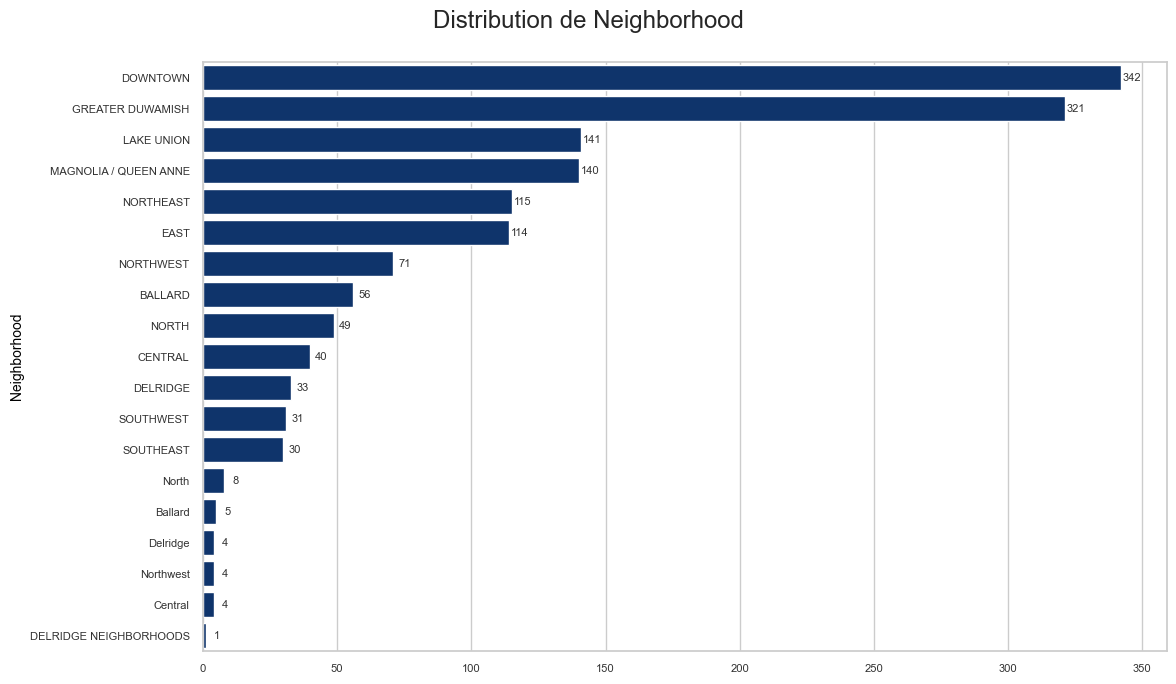

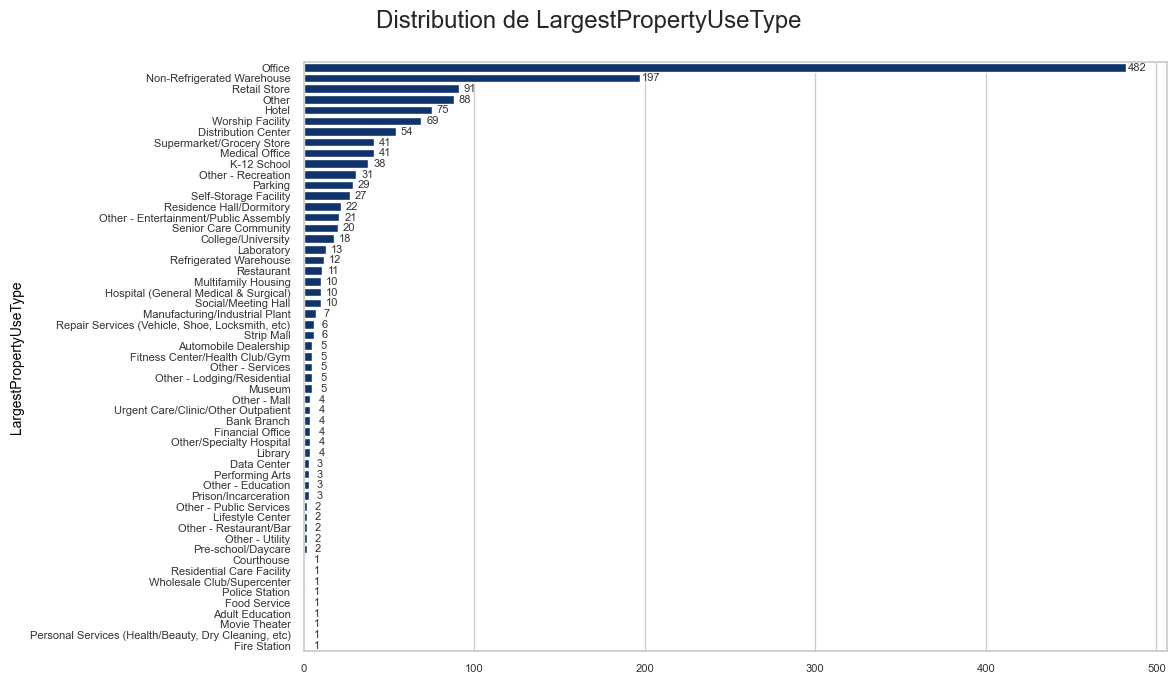

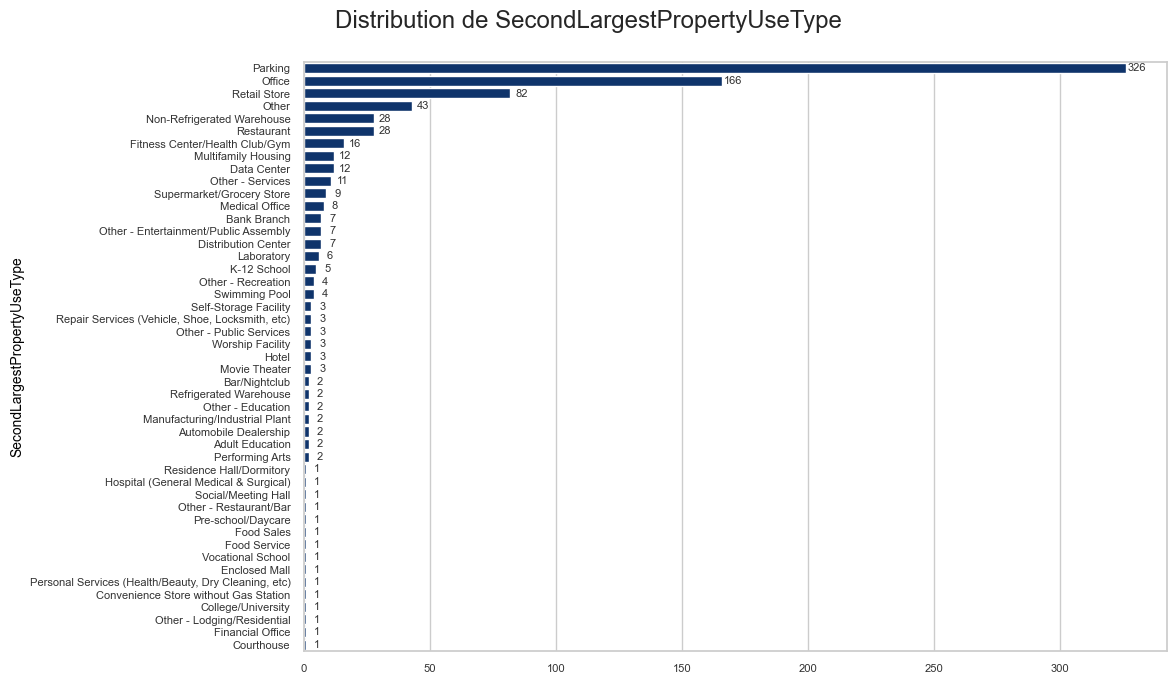

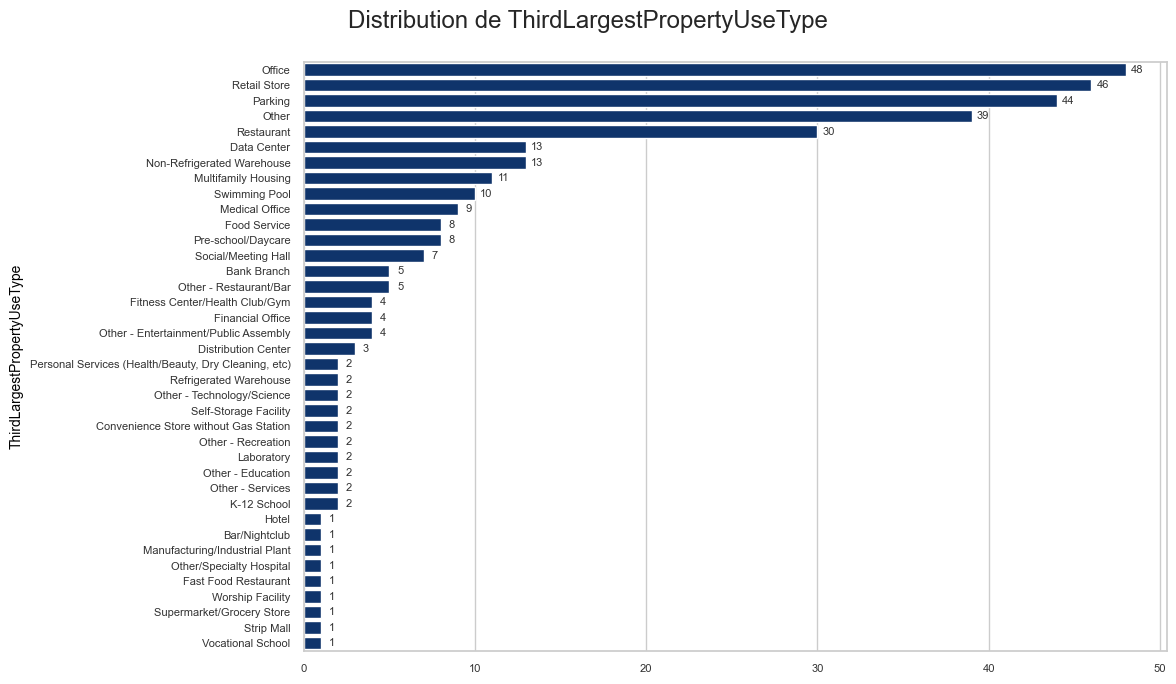

In [35]:
# Generates graphs by variable
for col in df_clean.select_dtypes('object'):
    # Count the occurrences of each unique value in the column
    counts = df_clean[col].value_counts(normalize=False)
    plt.figure(figsize=(12,7))
    # Display barplot
    ax = sns.barplot(y=counts.index, x=counts.values, color="#00317a") 

    # Add the values to the bar plot
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(8, 0), textcoords='offset points', color="#333", fontsize="8")  
        
    # Add a unique title for each target
    plt.suptitle(f"Distribution de {col}")
    plt.tight_layout()

La colonne `Neighborhood` contient de légères **anomalies concernant la casse des valeurs**. Cela génère une dichotomie des catégories supplémentaire qui n'a pas lieu d'être. Cette problématique sera **traitée lors de la phase de pré-processing** afin de constater l'impacte sur les résultats de prédictions. Les autres informations ont une répartition inéquitable.

La distribution des données de types `float` est maintenant observée.

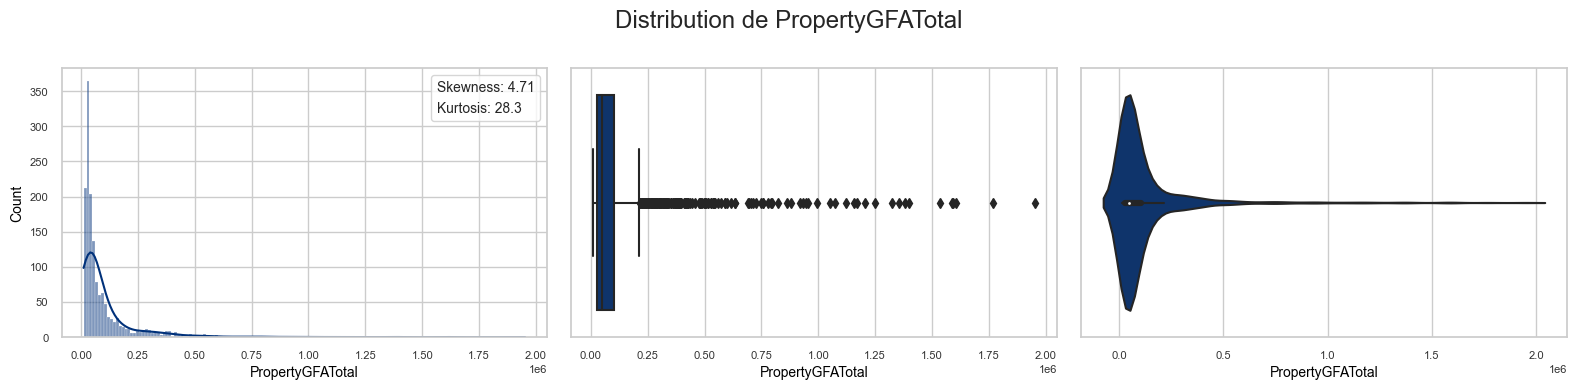

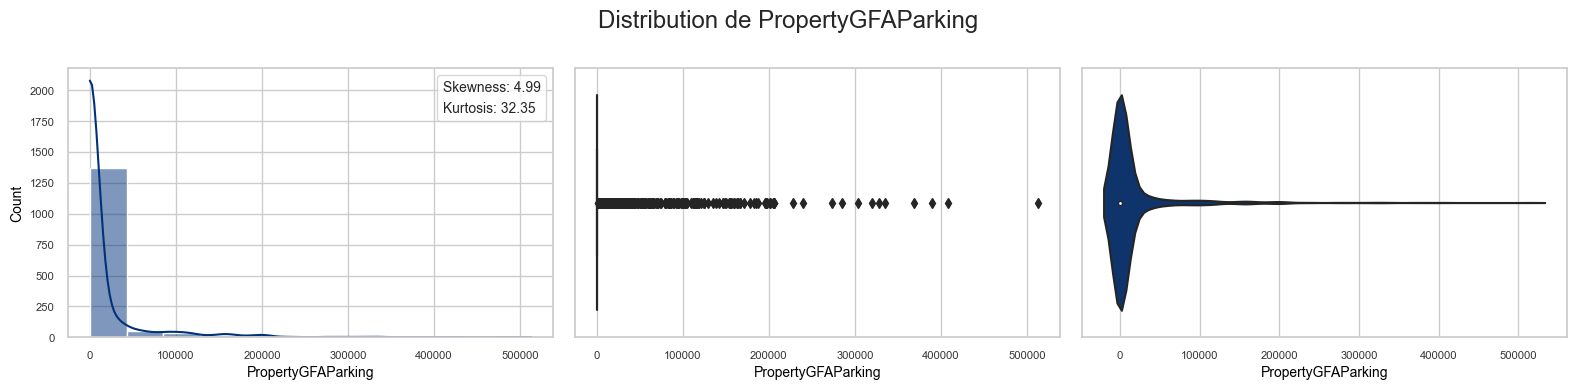

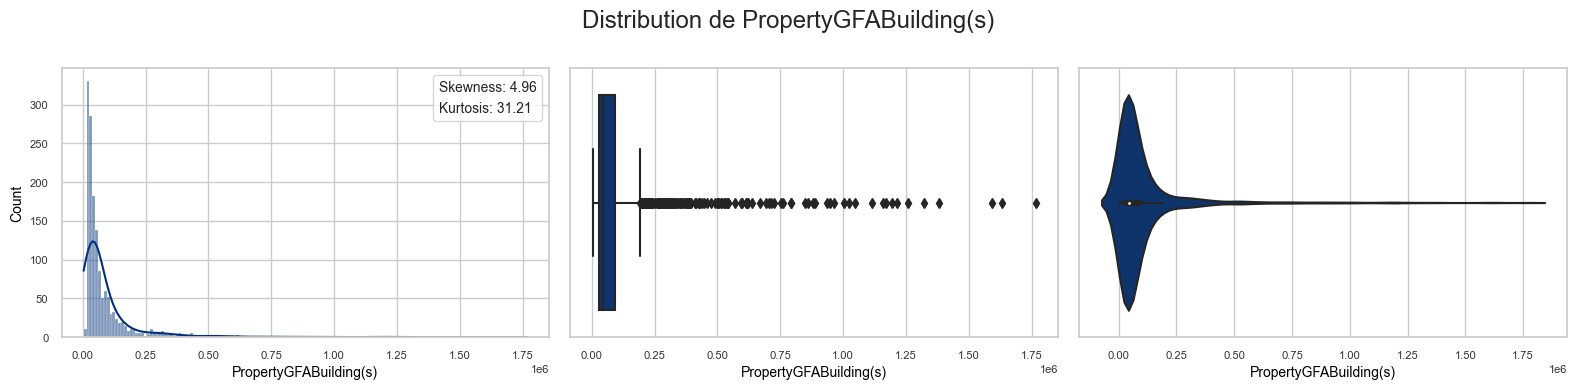

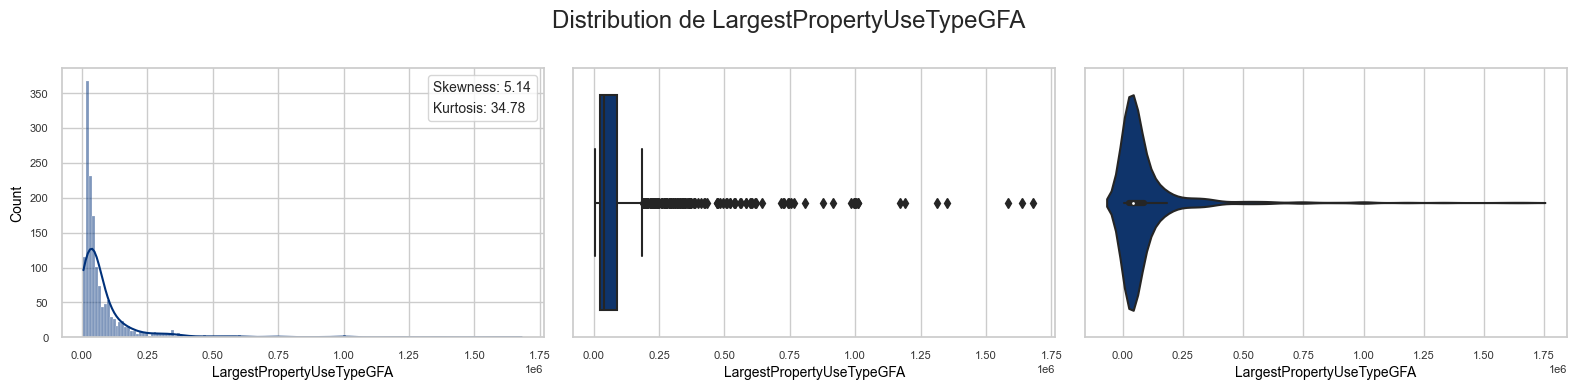

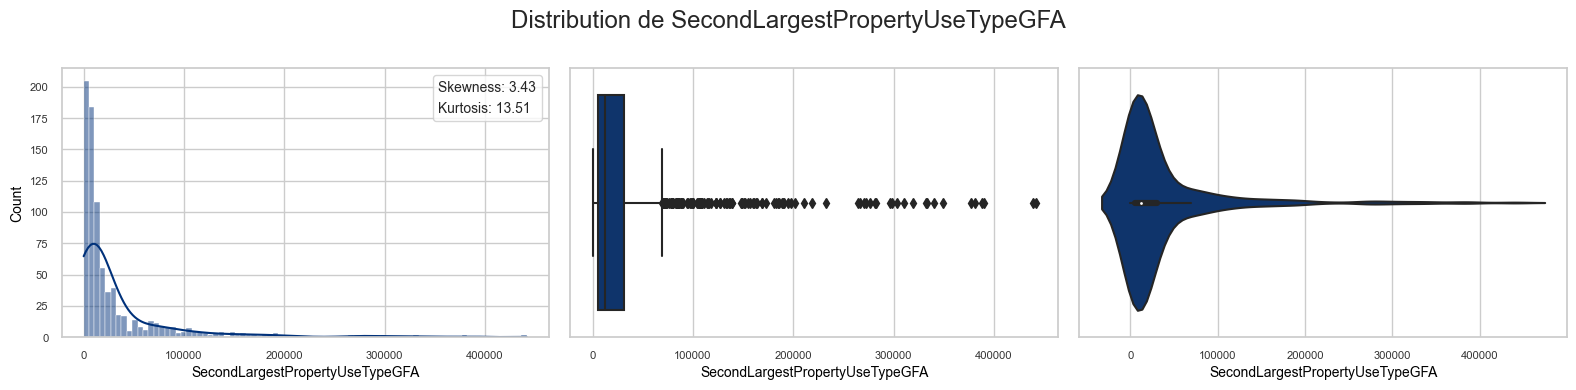

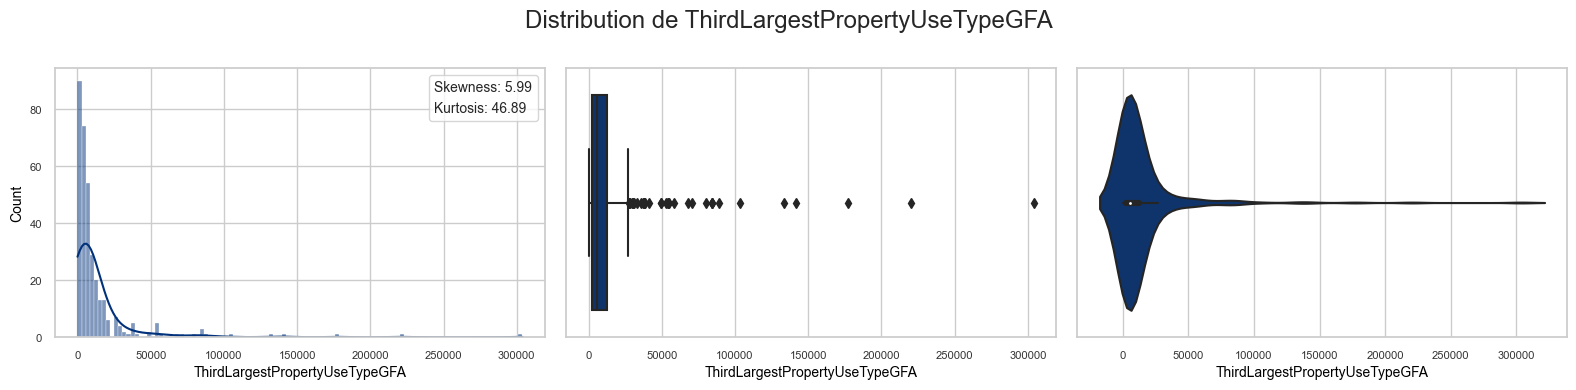

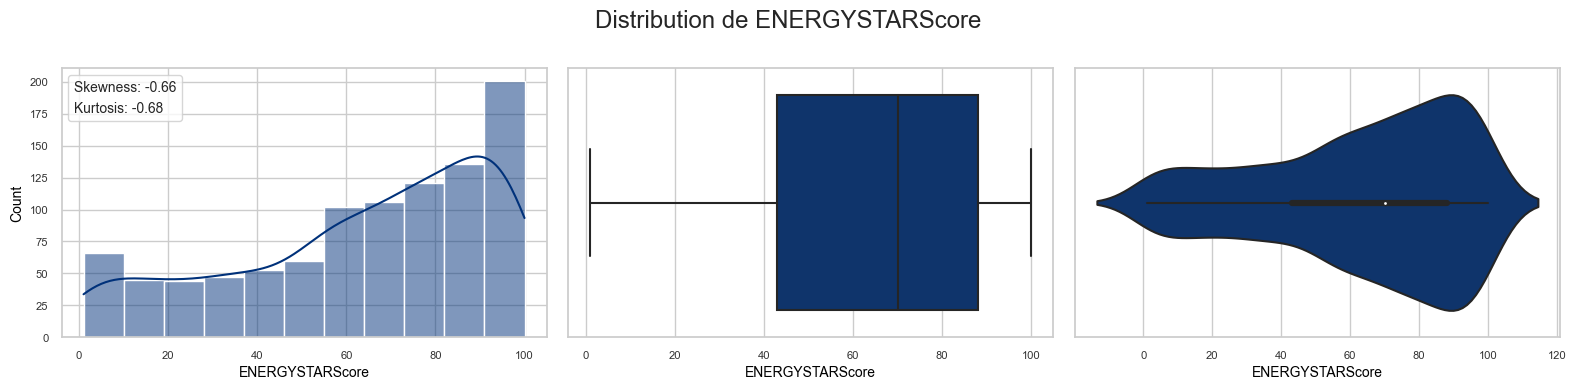

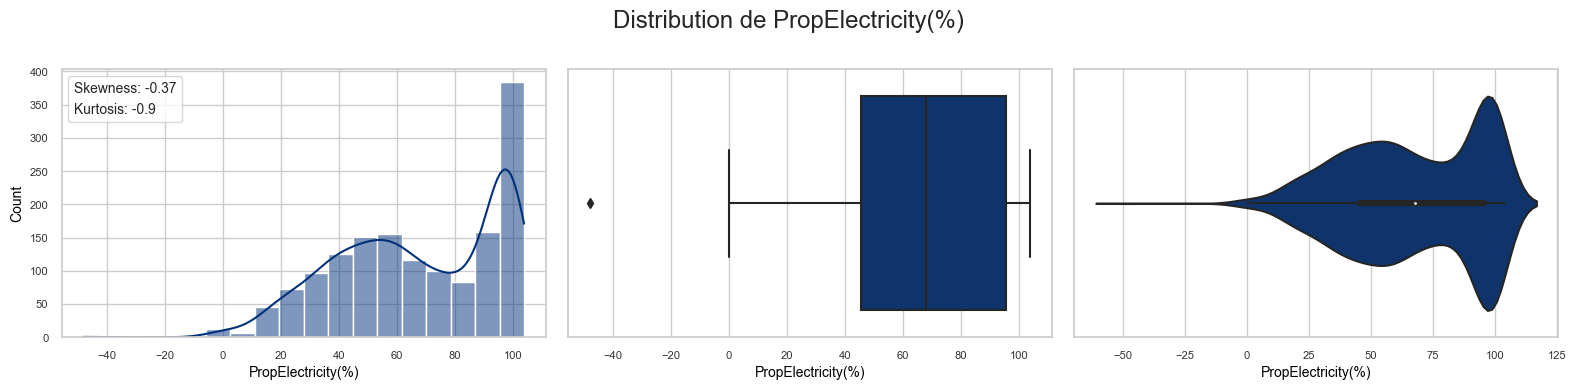

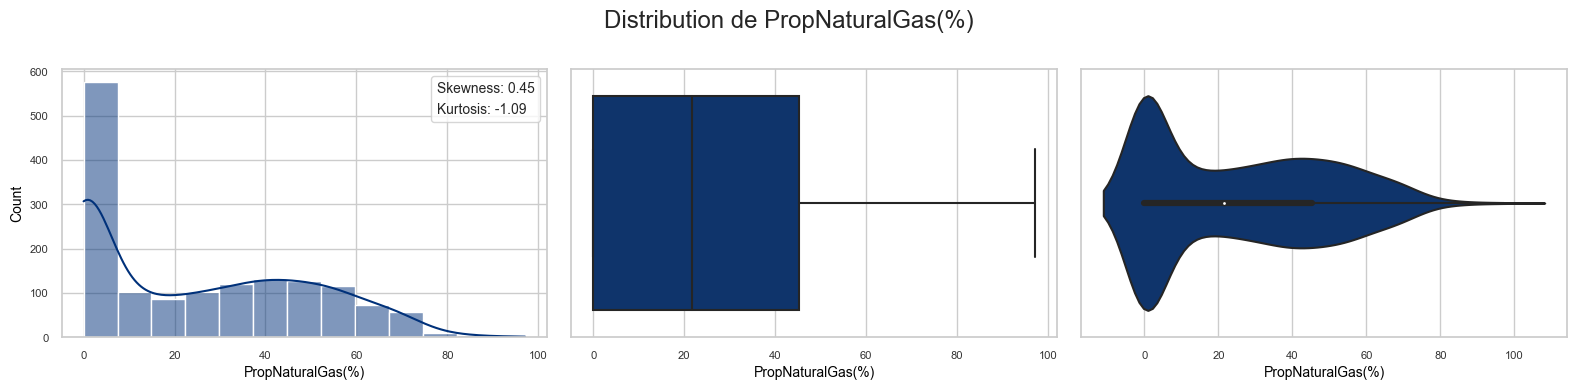

In [36]:
# Generates graphs by variable
for col in df_clean.select_dtypes('float').drop(columns=targets+["Latitude","Longitude"]):
    fig, axs = plt.subplots(1, 3, figsize=(16,4))

    # Calculate skewness and kurtosis
    skewness = round(df_clean[col].skew(), 2)
    kurtosis = round(df_clean[col].kurtosis(), 2)

    # Display histogram
    sns.histplot(data=df_clean, x=df_clean[col], kde="kind", color="#00317a", ax=axs[0])
    # Add skewness and average to legend
    axs[0].legend([f"Skewness: {skewness}", f"Kurtosis: {kurtosis}"], fontsize="10", handlelength=0, handletextpad=0)
    # Create a boxplot
    sns.boxplot(data=df_clean, x=df_clean[col], orient="h", color="#00317a", ax=axs[1])
    # Create a violinplot
    sns.violinplot(data=df_clean, x=df_clean[col], orient="h", color="#00317a", ax=axs[2])
    
    # Add a unique title for each target
    plt.suptitle(f"Distribution de {col}")
    plt.tight_layout()

La colonne `PropNaturalGas(%)` contient une valeur négative, ce qui est considéré comme outlier puisque il ne peut y avoir de proportion < 0. Les mesures de formes indiquent également une distribution étalée à droite pour les variables `..UseTypeGFA`. Leurs distribution est également affichée avec l'application d'une fonction logarithmique.

c:\Users\remid\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


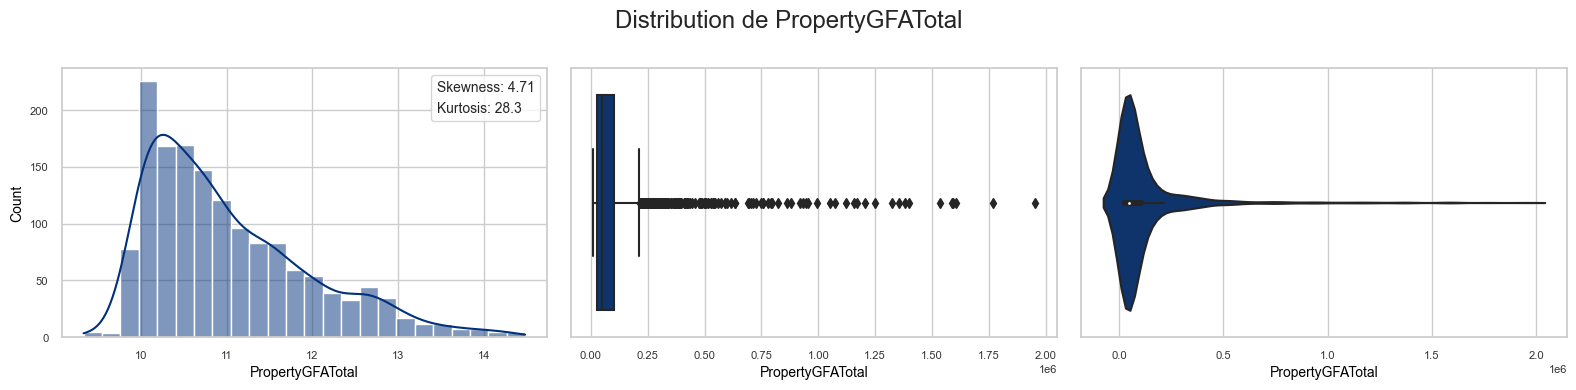

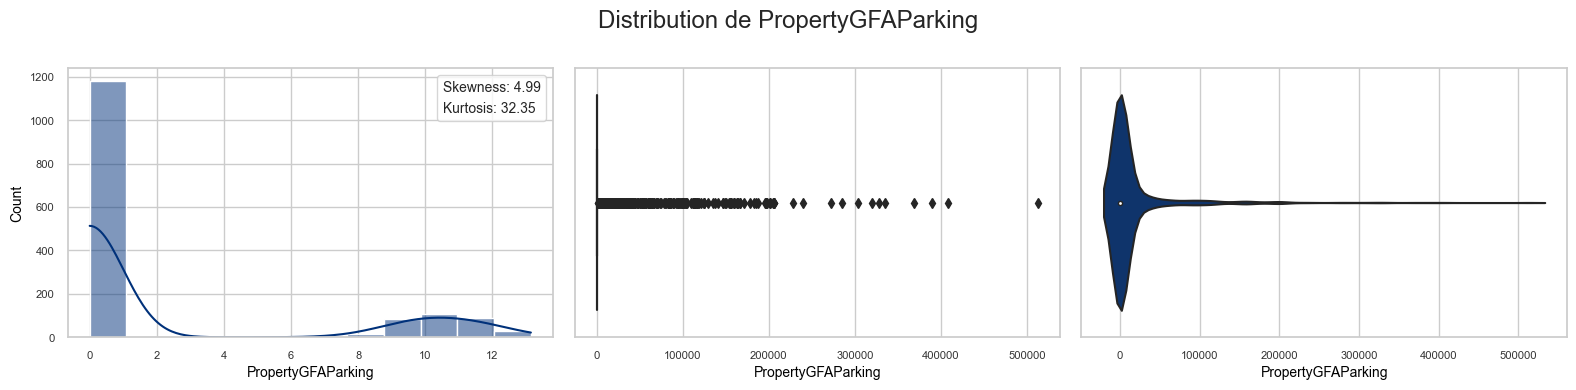

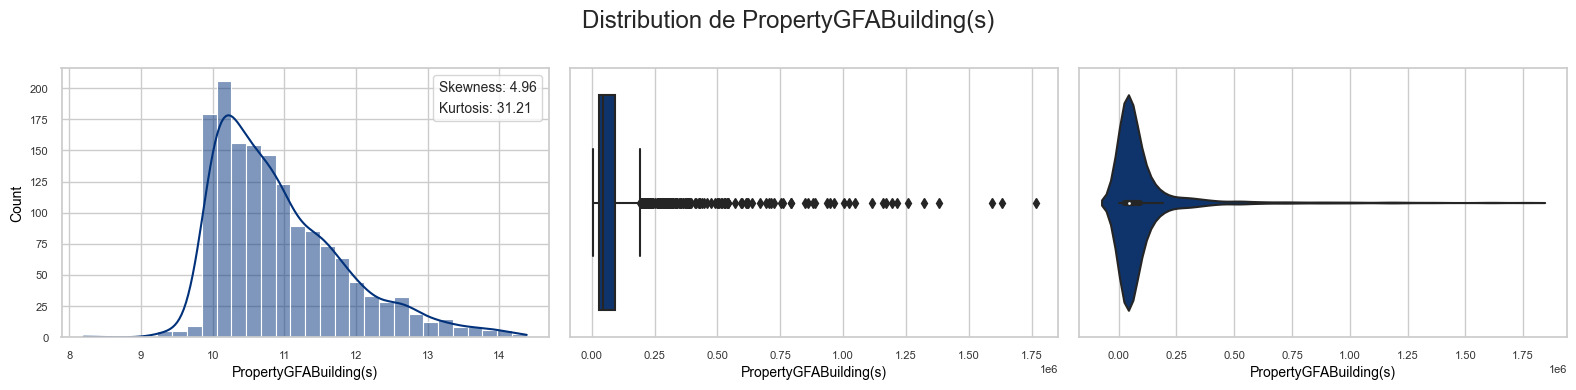

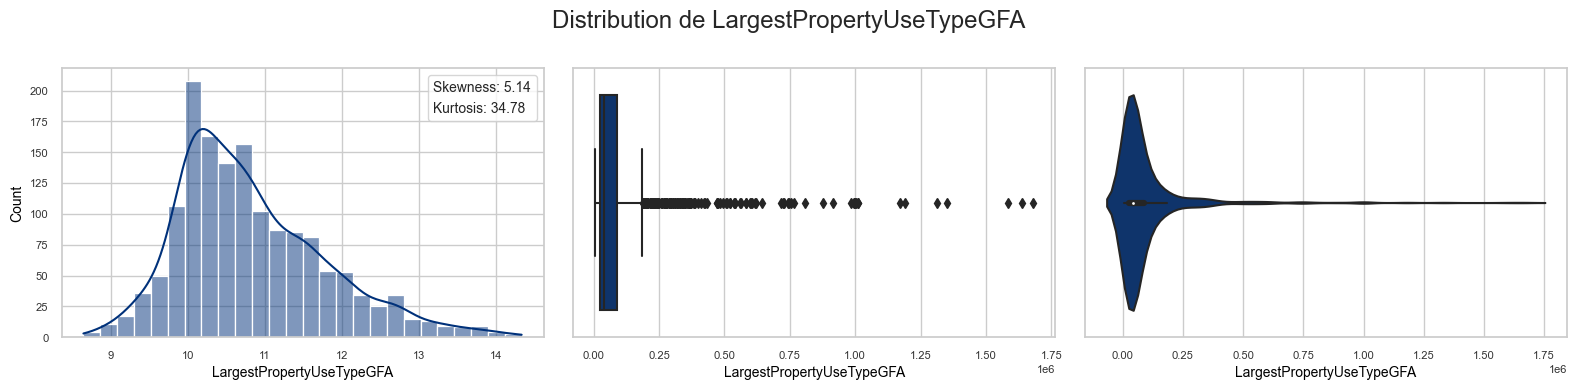

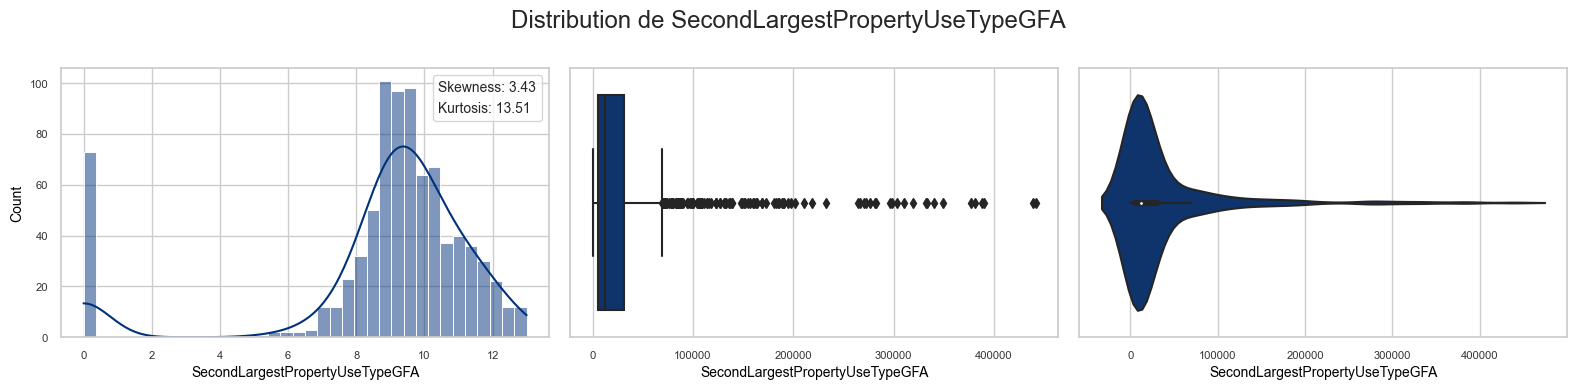

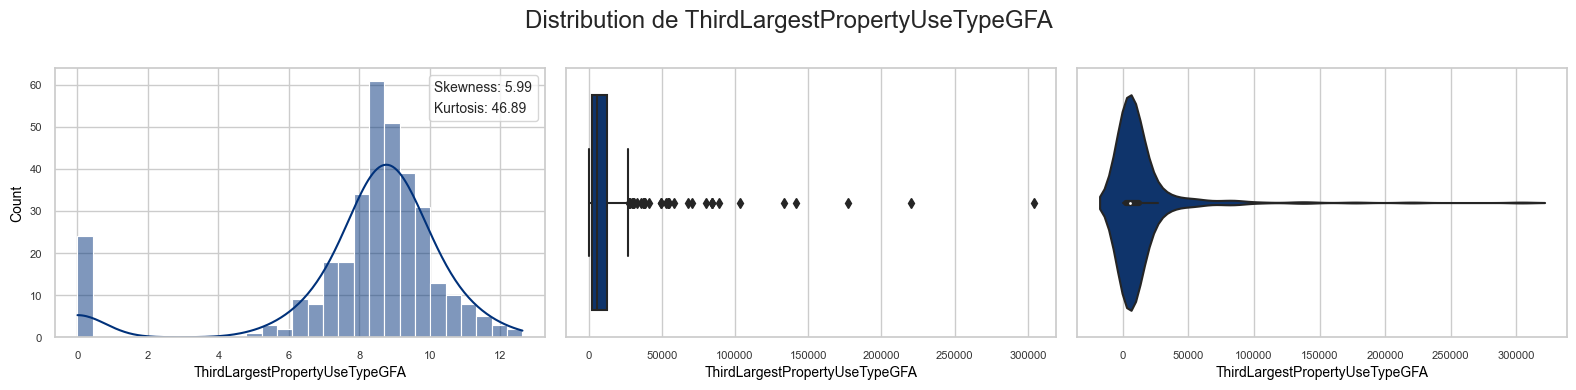

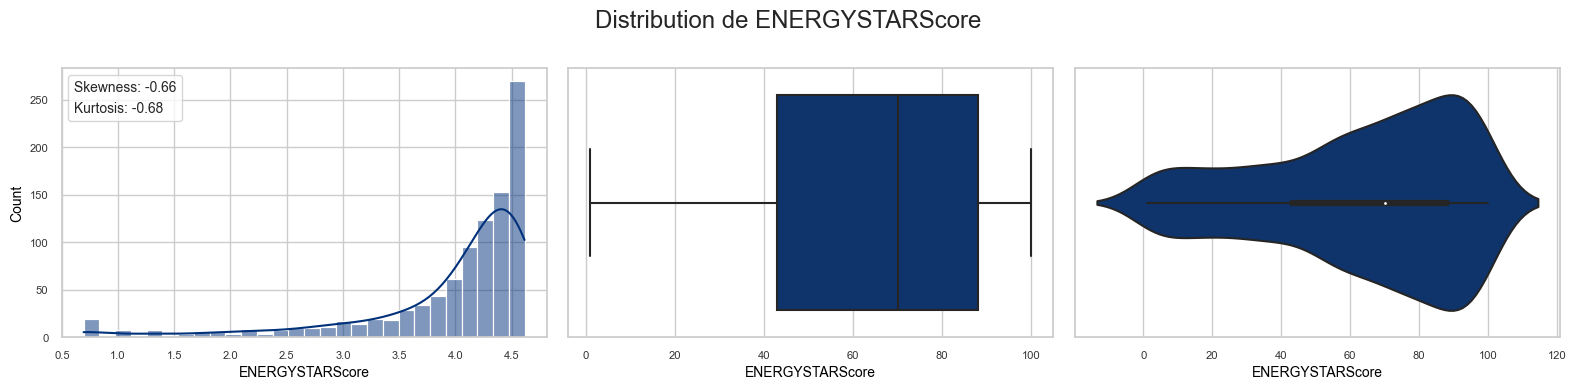

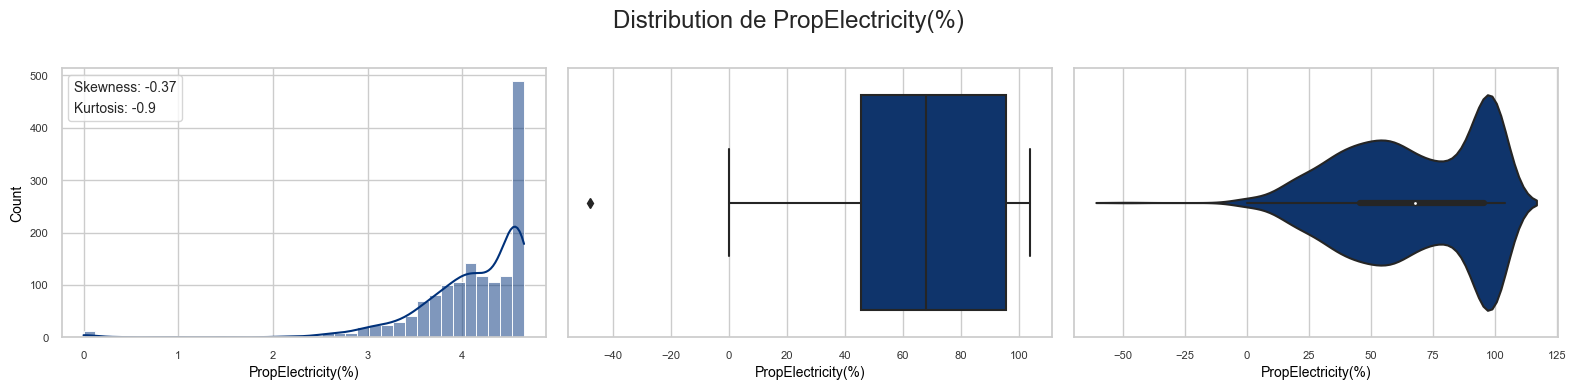

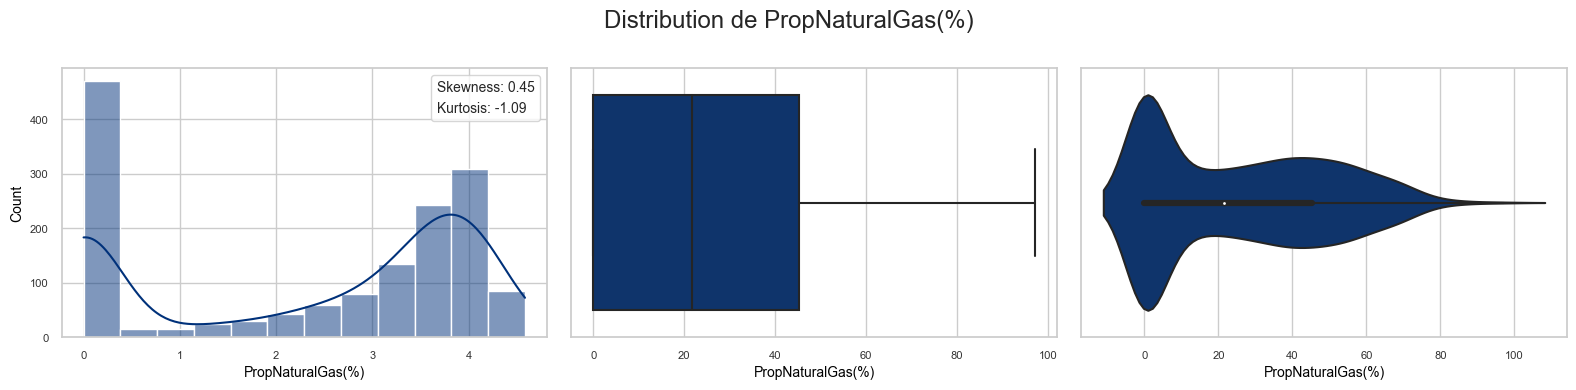

In [37]:
# Generates graphs by variable
for col in df_clean.select_dtypes('float').drop(columns=targets+["Latitude","Longitude"]):
    fig, axs = plt.subplots(1, 3, figsize=(16,4))

    # Calculate skewness and kurtosis
    skewness = round(df_clean[col].skew(), 2)
    kurtosis = round(df_clean[col].kurtosis(), 2)

    # Display histogram
    sns.histplot(data=df_clean, x=np.log1p(df_clean[col]), kde="kind", color="#00317a", ax=axs[0])
    # Add skewness and average to legend
    axs[0].legend([f"Skewness: {skewness}", f"Kurtosis: {kurtosis}"], fontsize="10", handlelength=0, handletextpad=0)
    # Create a boxplot
    sns.boxplot(data=df_clean, x=df_clean[col], orient="h", color="#00317a", ax=axs[1])
    # Create a violinplot
    sns.violinplot(data=df_clean, x=df_clean[col], orient="h", color="#00317a", ax=axs[2])
    
    # Add a unique title for each target
    plt.suptitle(f"Distribution de {col}")
    plt.tight_layout()

L'application de la fonction logarithmique dimunie bien la variance mais les **valeurs = 0 impacte considérablement les mesures de formes pour les 2ème et 3ème types d'utilisation des bâtiments ainsi que la surface brut de parking**. 

La distribution des données de types `int` est maintenant observée.

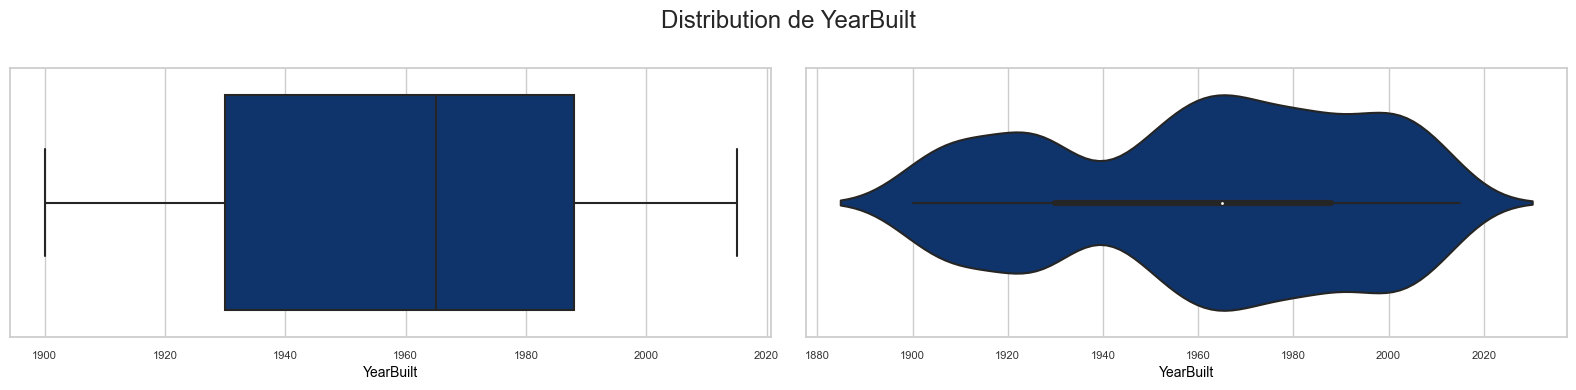

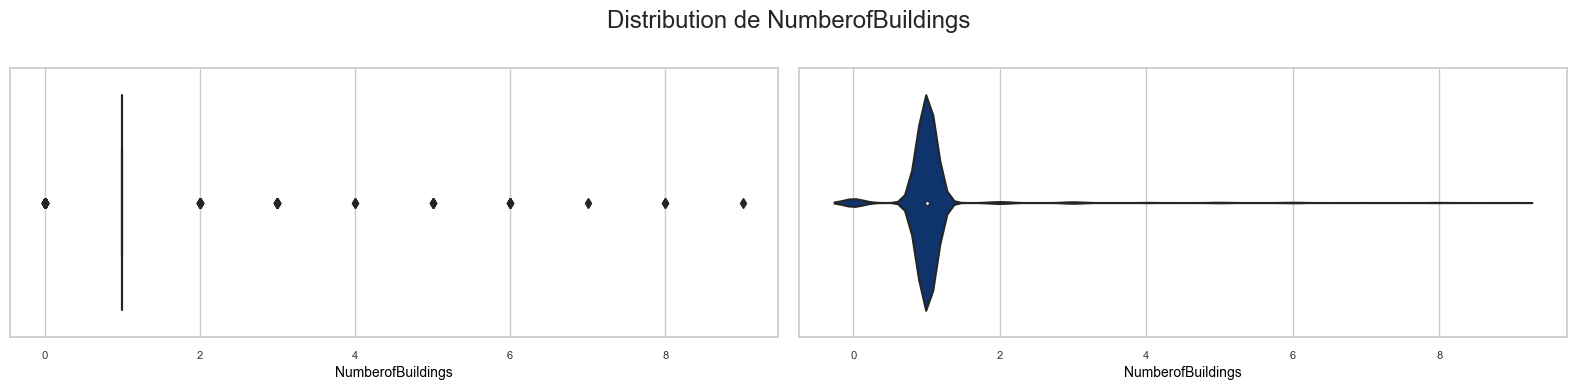

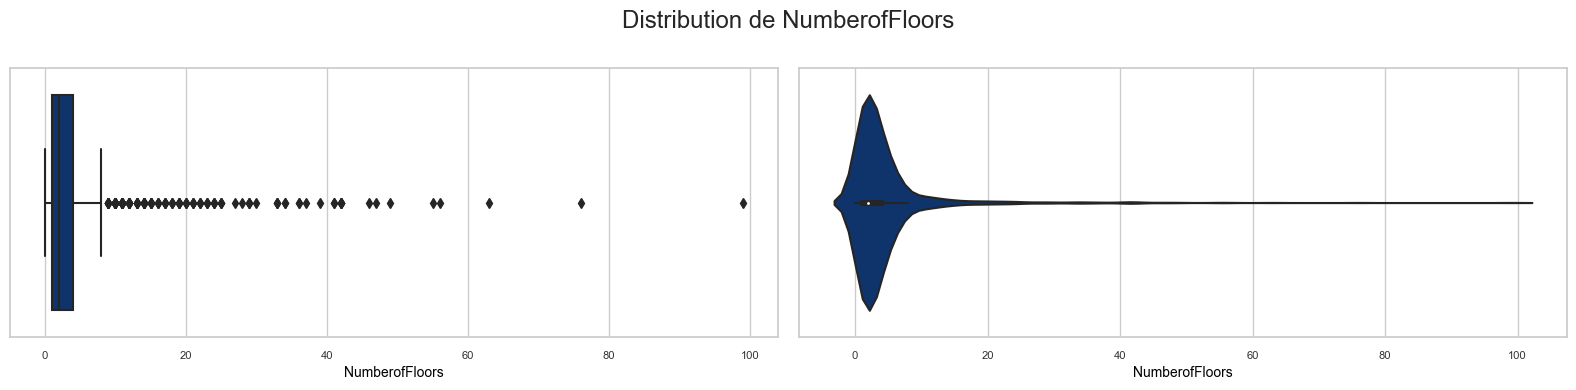

In [38]:
# Generates graphs by variable
for col in df_clean.select_dtypes('int'):
    fig, axs = plt.subplots(1, 2, figsize=(16,4))

    # Create a boxplot
    sns.boxplot(data=df_clean, x=df_clean[col], orient="h", color="#00317a", ax=axs[0])
    # Create a violinplot
    sns.violinplot(data=df_clean, x=df_clean[col], orient="h", color="#00317a", ax=axs[1])
    
    # Add a unique title for each target
    plt.suptitle(f"Distribution de {col}")
    plt.tight_layout()

L'analyse montre ici que la caractéristique `NumberofBuildings` contient plusieurs bâtiments avec une valeur = 0, cela ressemble à une valeur atypique puisque qu'un individu représente au minimum 1 bâtiment. La valeur minimale devrait être = 1 hormis les bâtiments de type `Parking`. Un certain nombre de bâtiments ont également une valeur = 0 pour `NumberofFloors` et montre un immeuble approchant les **100 étages**, après vérification il semble que la ville de Seattle n'ait pas d'immeuble de ce type, **le plus grand référencé a 76 étages** selon wikipédia.

La proportion de bâtiments ayant ou non un `Parking` est observée.

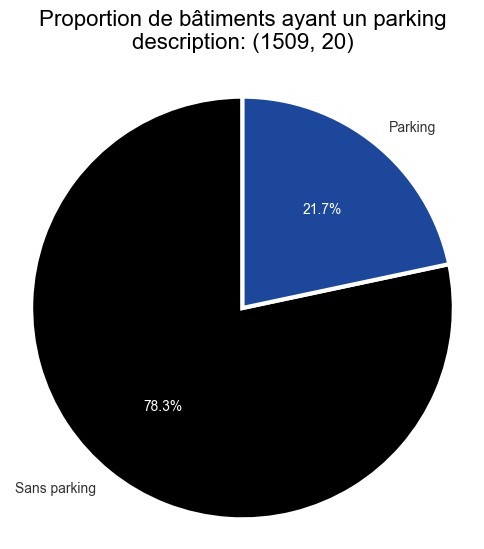

In [39]:
# Data for pie chart
data = (df_clean["PropertyGFAParking"] > 0).value_counts()
labels = ["Sans parking", "Parking"]
# Define color code
colors = ['#000',"#1d479b"]

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title(f"Proportion de bâtiments ayant un parking\ndescription: {df.shape}")
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#333", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

### **3. Visualisation des relations features-target**

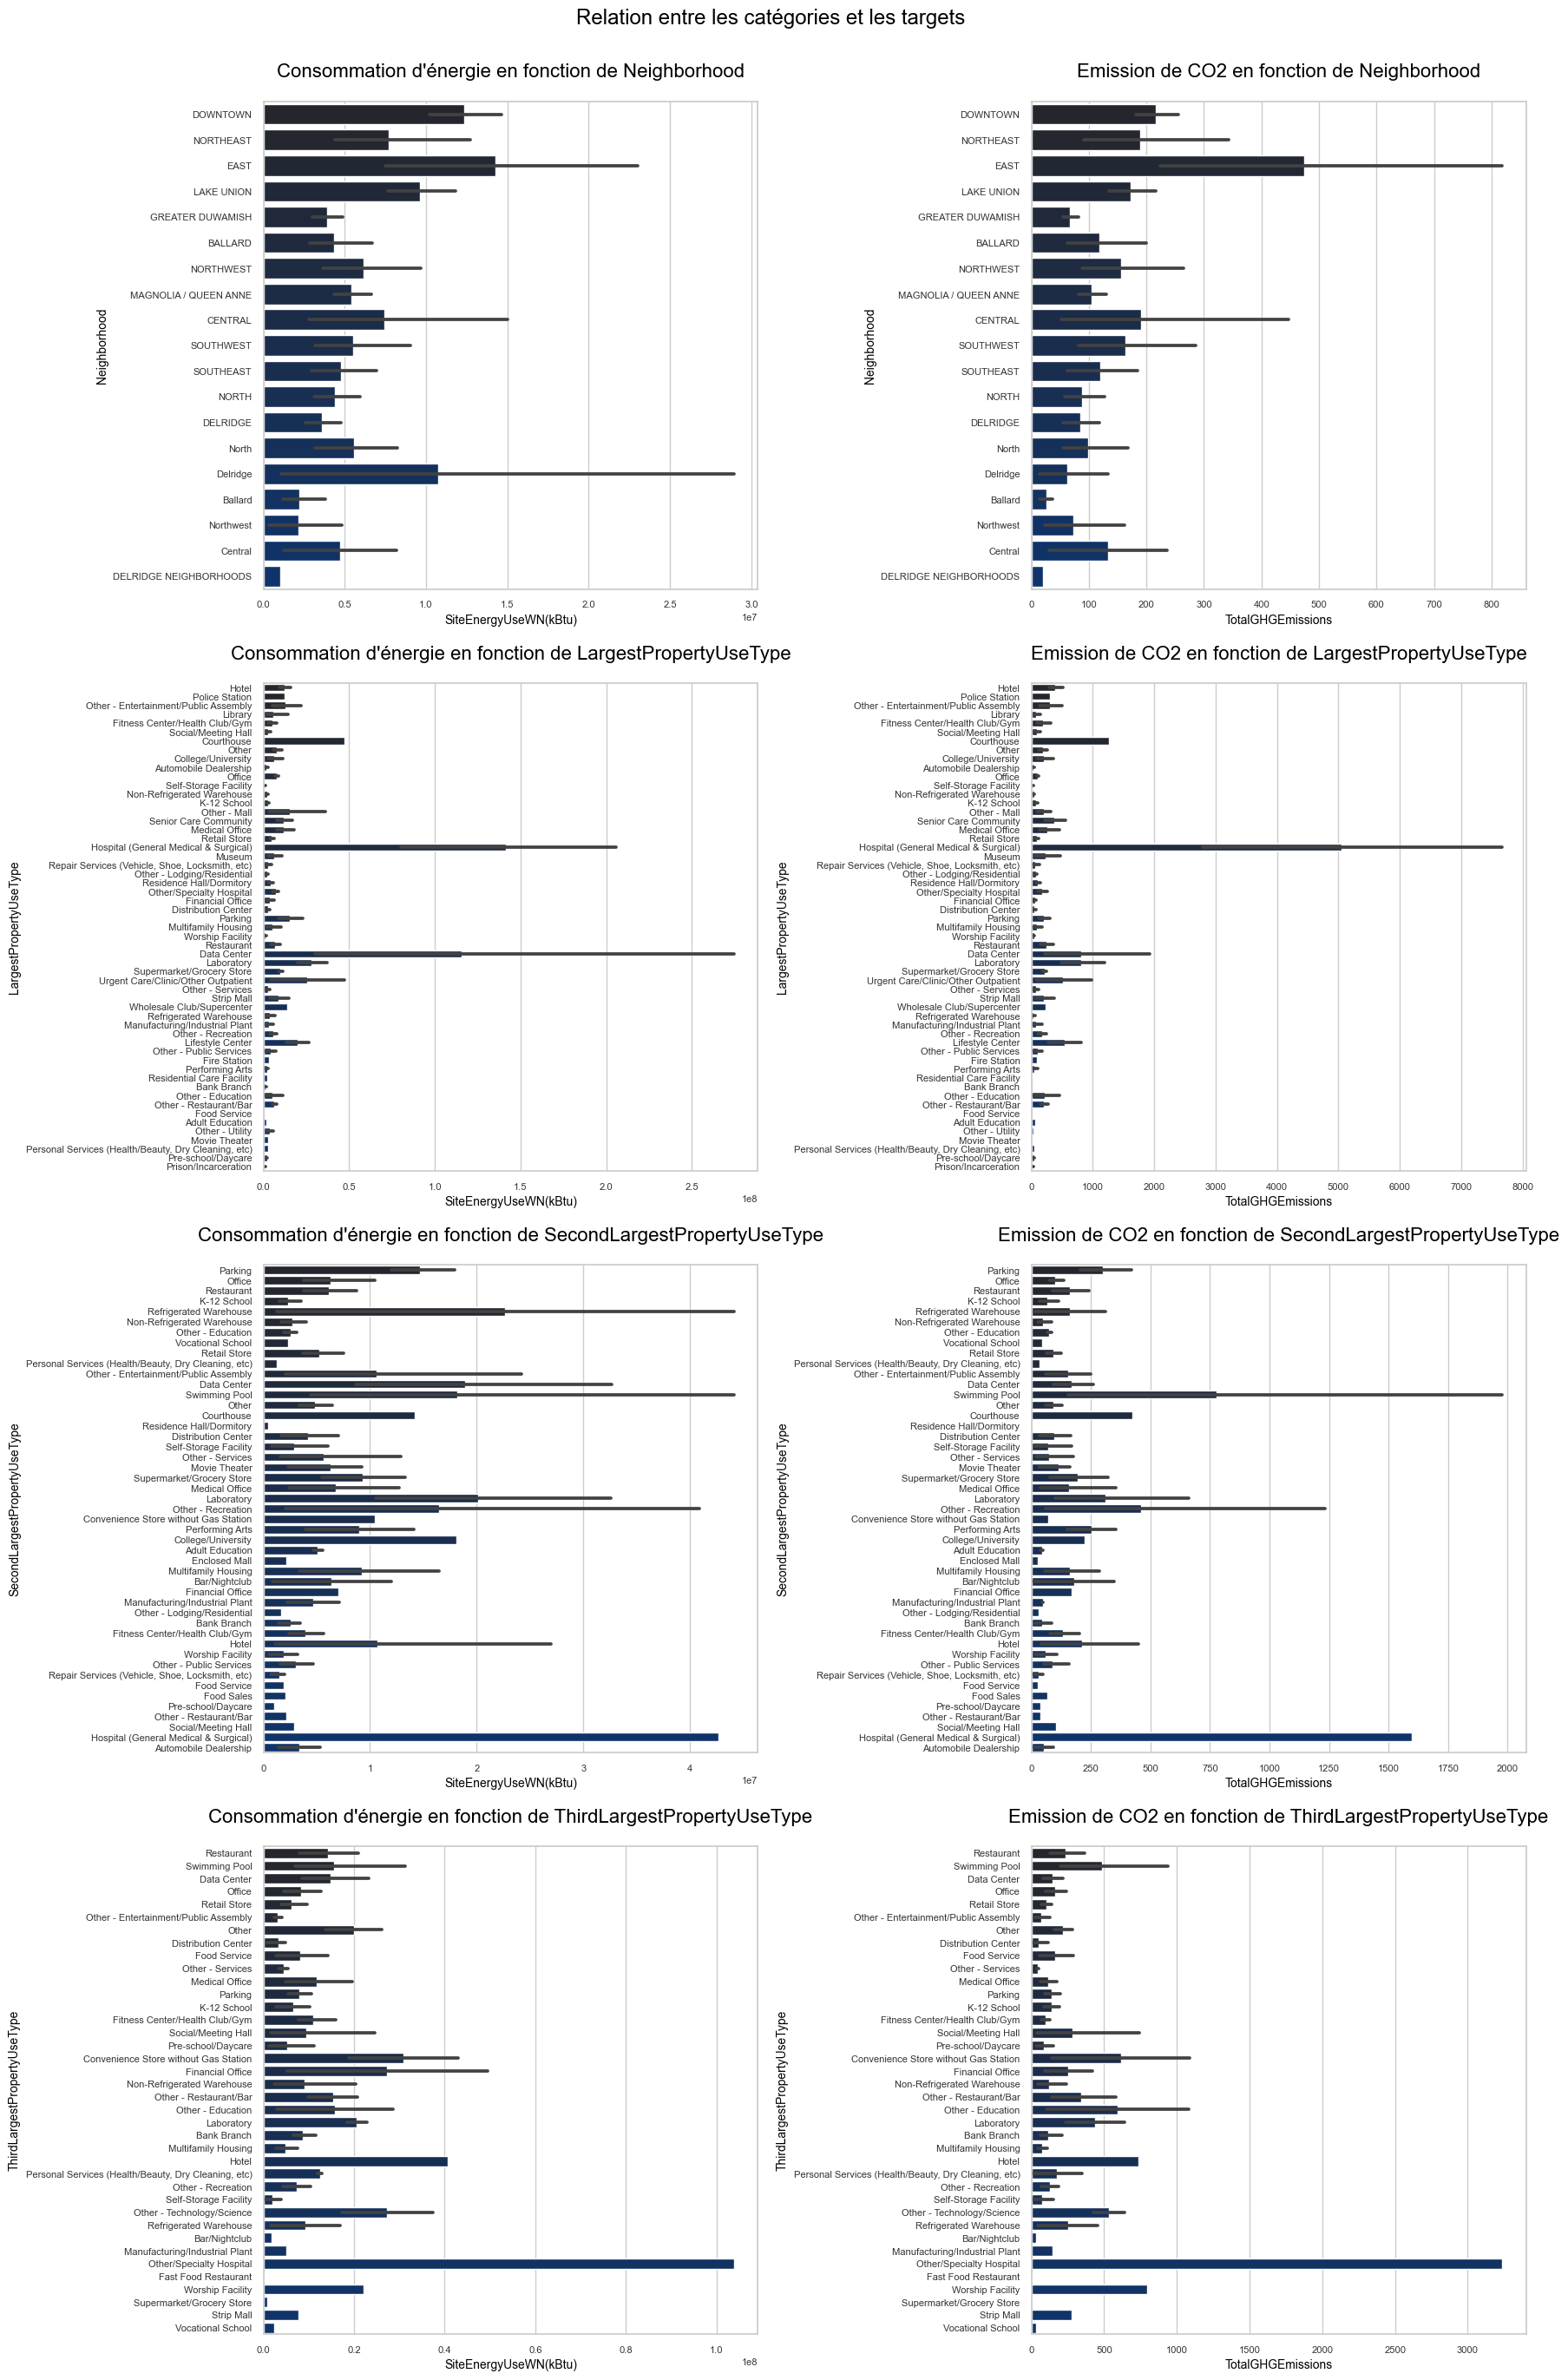

In [40]:
# Define number of subplots per line
n_plots_per_row = 2
# Create a figure with several subplots
fig, axes = plt.subplots(nrows=len(df_clean.select_dtypes("object").columns), ncols=n_plots_per_row, figsize=(18, 7*len(df_clean.select_dtypes("object").columns)))
# Add a unique title for each target
plt.suptitle(f"Relation entre les catégories et les targets\n\n", color="#000")

# Browse each 'object' column
for i, col in enumerate(df_clean.select_dtypes("object").columns):
    # Colour palette for the various graphics
    palette_map = sns.color_palette("dark:#00317a", n_colors=df_clean[col].nunique(),as_cmap=False)
    # Create a bar graph in the left subplot
    ax = axes[i, 0]
    sns.barplot(x='SiteEnergyUseWN(kBtu)', y=col, data=df_clean, ax=ax, palette=palette_map)
    ax.set_title(f'Consommation d\'énergie en fonction de {col}')  # Ajoute un titre au graphique

    # Create a bar graph in the right subplot
    ax = axes[i, 1]
    sns.barplot(x='TotalGHGEmissions', y=col, data=df_clean, ax=ax, palette=palette_map)
    ax.set_title(f'Emission de CO2 en fonction de {col}')  # Ajoute un titre au graphique

# Automatically adjust margins to avoid overlapping subplots
plt.tight_layout()  
# Display figure
plt.show()

**La relation entre les catégories et les targets montre la présence d'une corrélation**. En effet, plus un bâtiment consomme plus il a tendance à émettre du CO2 à une seule exception près, les `Data Centers` qui emettre très peu de CO2 proportionnellement à leur consommation d'énergie.

Les bâtiments les plus énergivores sont: 
* `Refrigerateur Warehouse`, `Swimming Pool`, `Laboratory`, `Other-Recreation`, `Hotel`, `Hospital`

Et les plus émetteurs en CO2:
* `Swimming Pool`, `Other-Recreation`

La relation des colonnes de types float avec les targets est ensuite observée.

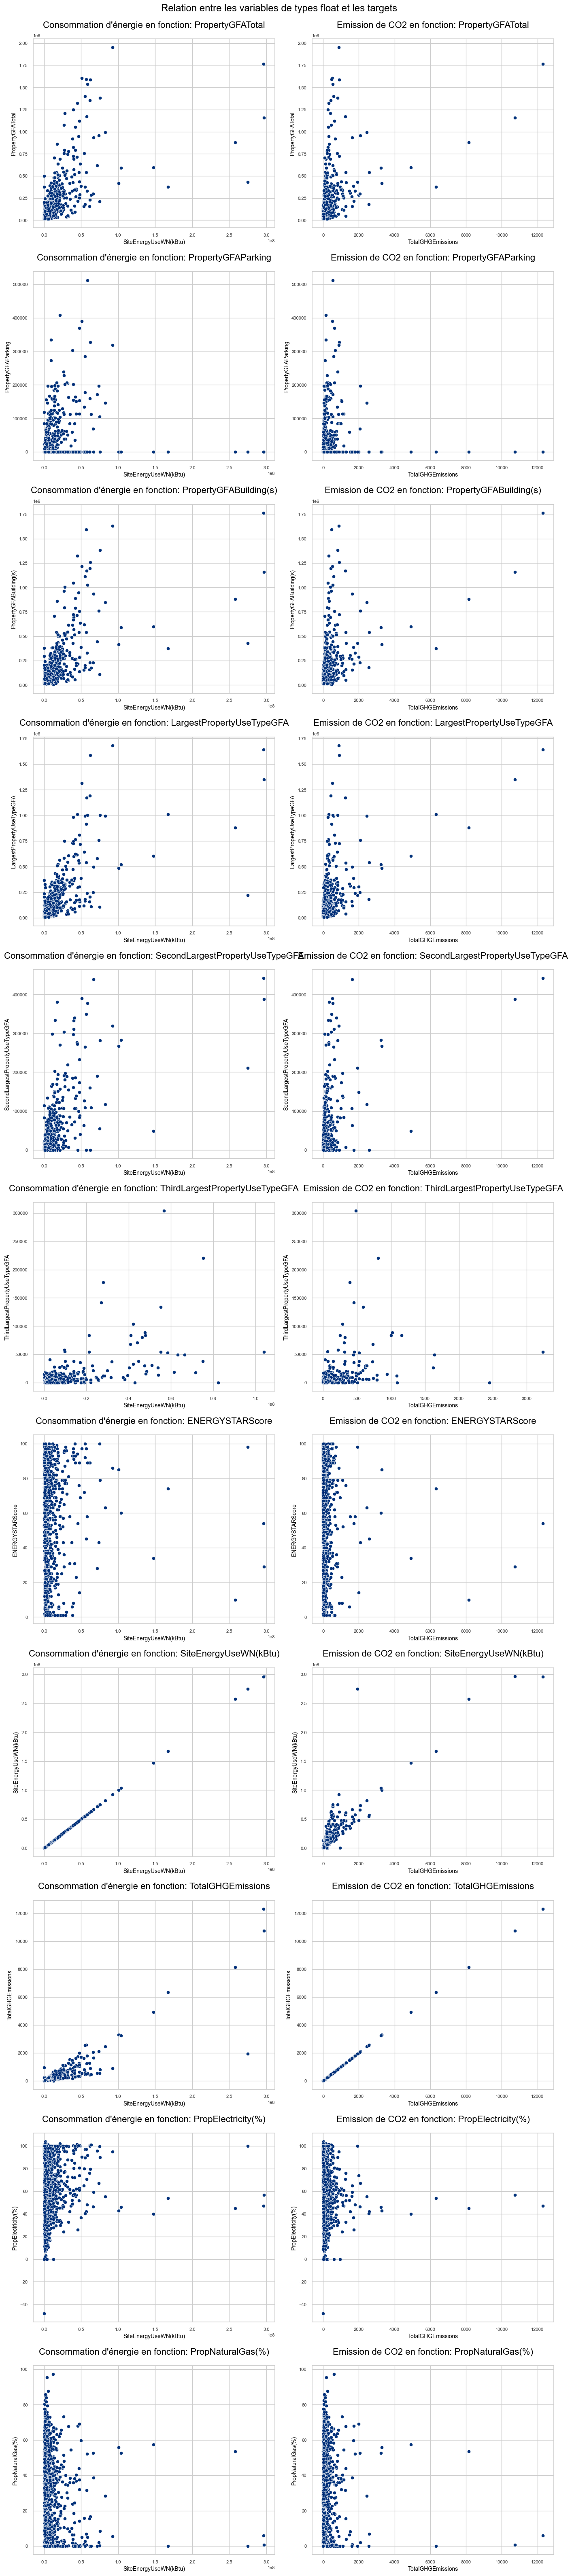

In [41]:
# Define number of subplots per line
n_plots_per_row = 2

# Create a figure with several subplots
fig, axes = plt.subplots(nrows=len(df_clean.select_dtypes("float").drop(columns=["Latitude","Longitude"]).columns), ncols=n_plots_per_row, figsize=(14, 5*len(df_clean.select_dtypes("float").columns)))
# Add a unique title for each target
plt.suptitle(f"Relation entre les variables de types float et les targets\n\n\n\n", color="#000")

# Browse each 'object' column
for i, col in enumerate(df_clean.select_dtypes("float").drop(columns=["Latitude","Longitude"]).columns):
    # Colour palette for the various graphics
    #palette_map = sns.color_palette("dark:#00317a", n_colors=df_clean[col].nunique(),as_cmap=False)
    # Create a bar graph in the left subplot
    ax = axes[i, 0]
    sns.scatterplot(x='SiteEnergyUseWN(kBtu)', y=col, data=df_clean, ax=ax, color="#00317a")
    ax.set_title(f'Consommation d\'énergie en fonction: {col}')  # Ajoute un titre au graphique

    # Create a bar graph in the right subplot
    ax = axes[i, 1]
    sns.scatterplot(x='TotalGHGEmissions', y=col, data=df_clean, ax=ax, color="#00317a")
    ax.set_title(f'Emission de CO2 en fonction: {col}')  # Ajoute un titre au graphique

# Display figure
plt.tight_layout()  # Ajuster automatiquement les marges pour éviter que les subplots se chevauchent

La relation entre les variables de types float et la target permet d'**identifier 5/6 individus** qui sortent du lot et qui pourraient être **considérés comme des outliers**. Notamment les individus ayant une valeur de 0 sur l'axe y et qui ont une valeur positive pour la target, voir élevée.

Enfin, la relation entre les colonnes de types `int` et les targets est observée.

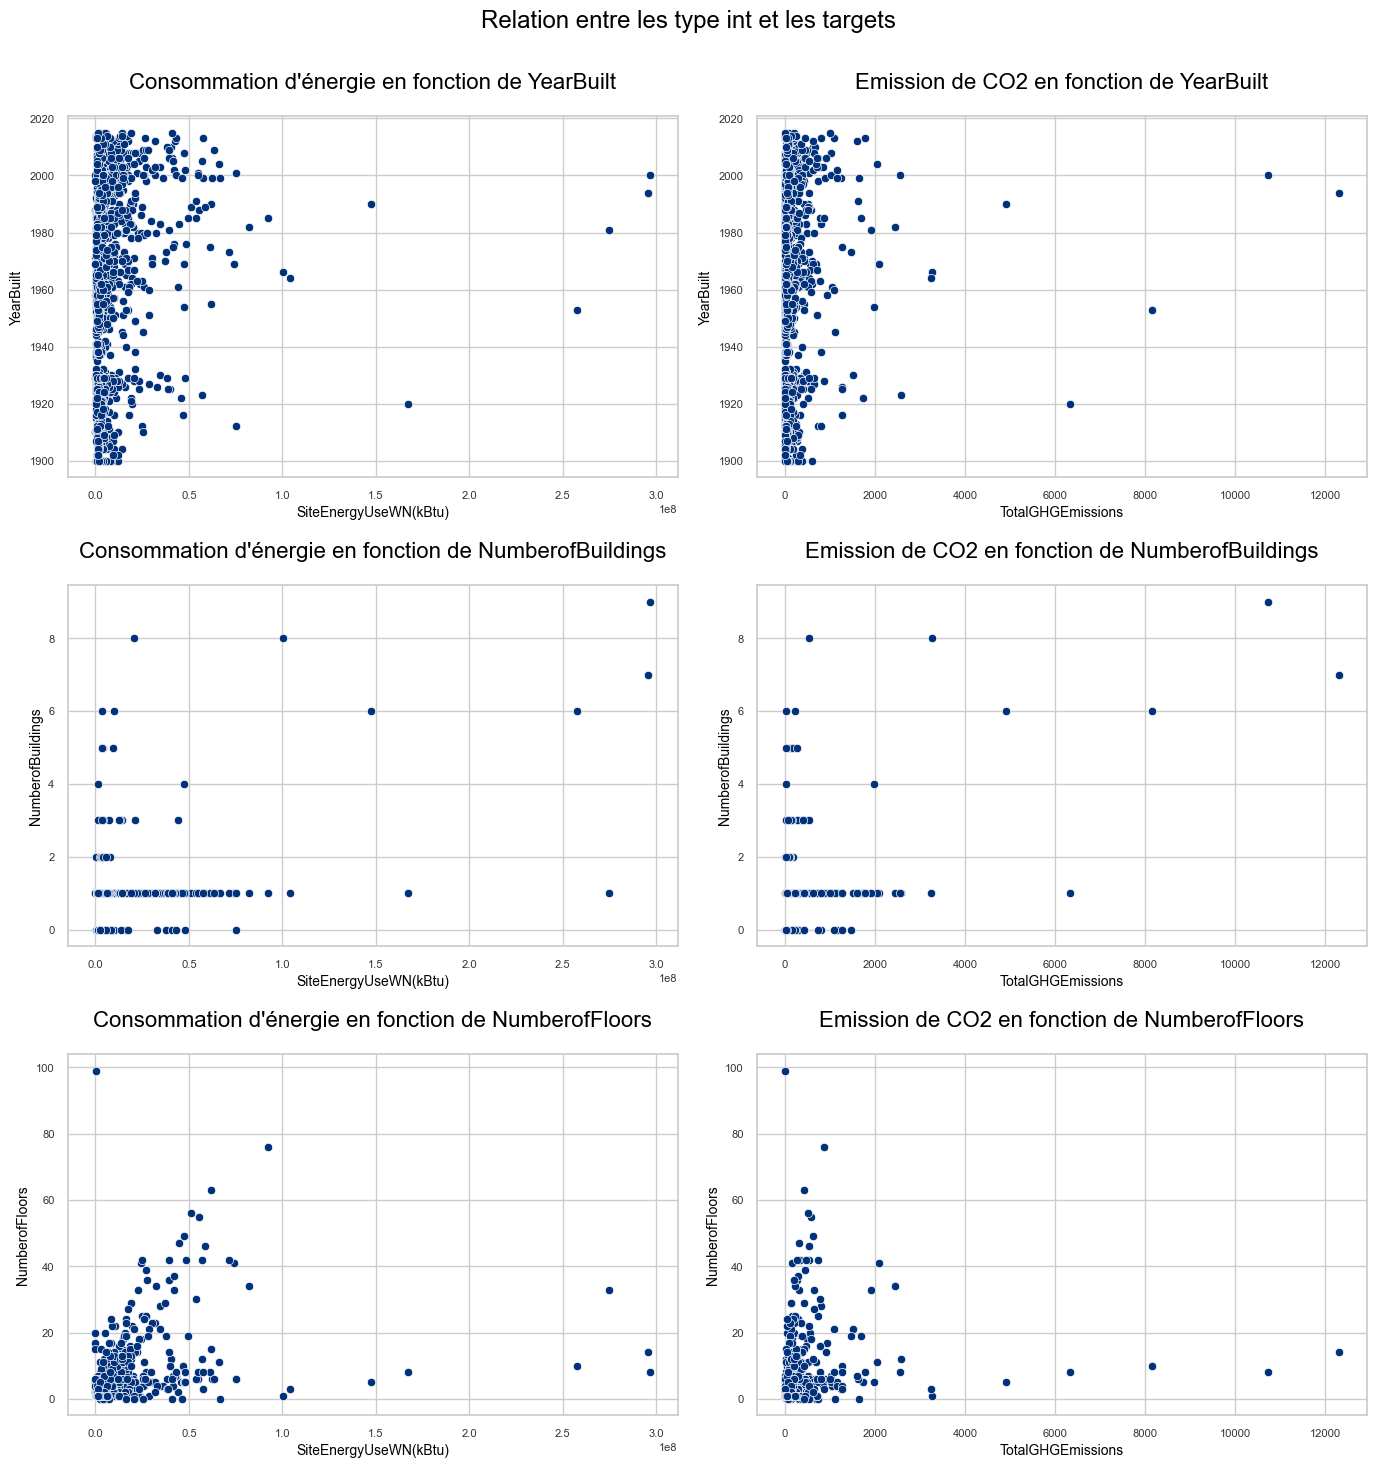

In [42]:
# Définir le nombre de subplots par ligne
n_plots_per_row = 2

# Créer une figure avec plusieurs subplots
fig, axes = plt.subplots(nrows=len(df_clean.select_dtypes("int").columns), ncols=n_plots_per_row, figsize=(14, 5*len(df_clean.select_dtypes("int").columns)))
# Add a unique title for each target
plt.suptitle(f"Relation entre les type int et les targets\n", color="#000")

# Parcourir chaque colonne de type 'object'
for i, col in enumerate(df_clean.select_dtypes("int").columns):
    # Colour palette for the various graphics
    #palette_map = sns.color_palette("dark:#00317a", n_colors=df_clean[col].nunique(),as_cmap=False)
    # Créer un graphique à barres dans le subplot de gauche
    ax = axes[i, 0]
    sns.scatterplot(x='SiteEnergyUseWN(kBtu)', y=col, data=df_clean, ax=ax, color="#00317a")
    ax.set_title(f'Consommation d\'énergie en fonction de {col}')  # Ajoute un titre au graphique

    # Créer un graphique à barres dans le subplot de droite
    ax = axes[i, 1]
    sns.scatterplot(x='TotalGHGEmissions', y=col, data=df_clean, ax=ax, color="#00317a")
    ax.set_title(f'Emission de CO2 en fonction de {col}')  # Ajoute un titre au graphique

# Afficher la figure
plt.tight_layout()  # Ajuster automatiquement les marges pour éviter que les subplots se chevauchent

### **4. Analyse des corrélations**

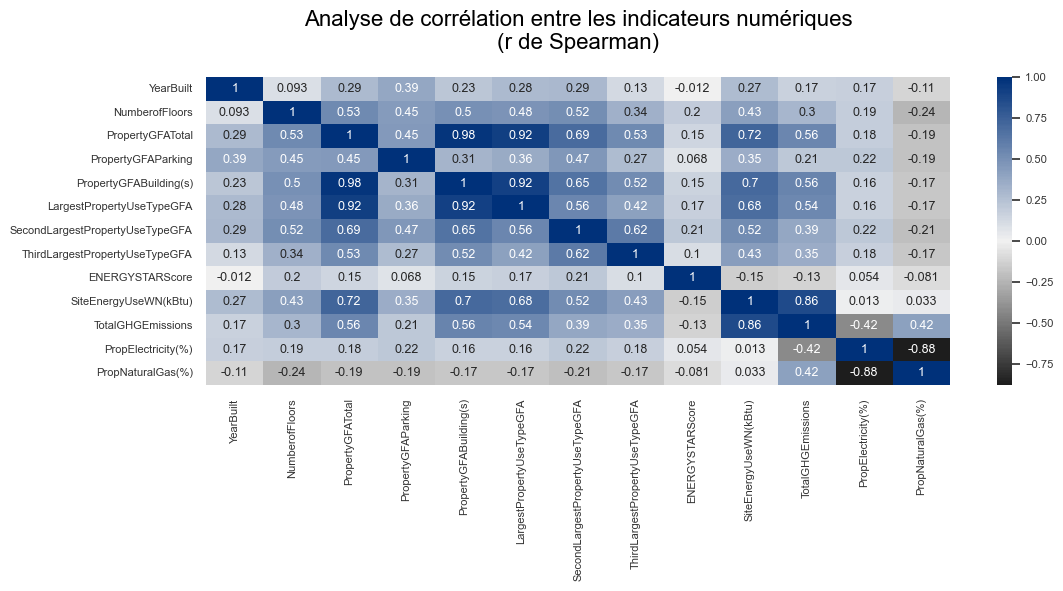

In [43]:
# Digital DF for correlation analysis
df_corr = df_clean.select_dtypes(include=['float64', 'int64']).drop(columns=["Latitude","Longitude"])

# Analysis of correlations between variables
plt.figure(figsize=(12,4))
sns.heatmap(df_corr.corr(method="spearman"), center=0, cmap=heatmap_color, annot=True, annot_kws={'size': 9})
plt.title('Analyse de corrélation entre les indicateurs numériques\n(r de Spearman)')
plt.show()

Les caractéristiques `ENERGYSTARScore`, `PropElectricity(%)` et `PropNaturalGas(%)` sont **très faiblement corrélé**s au reste des données, il semblerait qu'elle aient **un poids négligeable dans la mise en place du modèle**. C'est également le cas pour `YearBuilt` dans une moindre mesure.

In [44]:
df_clean.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_Final.csv", sep=",")

# Partie 2 - Ajout de nouvelles données

In [ ]:
df2.head(5)

In [ ]:
# Delete columns containing only null values
df2.dropna(axis=1, how="all", inplace=True)

In [ ]:
# Sélection des bâtiments non-résidentiel
df2 = df2.loc[df2["BuildingType"].str.lower().str.contains("nonresidential"),:]

In [ ]:
# Sélection des données qui n'ont pas de valeurs aberrantes
df2 = df2[df2["Outlier"].isnull()]

In [ ]:
# Supprime les bâtiments qui n'ont pas de donnée de consommation
df2 = df2[df2["SiteEnergyUseWN(kBtu)"].notnull()]

In [ ]:
# Sélection des varibles
df2 = df2.loc[:,['PrimaryPropertyType','CouncilDistrictCode',
       'Latitude','Longitude','YearBuilt','NumberofBuildings',
       'NumberofFloors', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       "SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA",
       "ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA",
       'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)',"Electricity(kBtu)","NaturalGas(kBtu)"]]

In [ ]:
# MAJ du type
df2["CouncilDistrictCode"] = df2["CouncilDistrictCode"].astype(str)
df2["NumberofBuildings"] = df2["NumberofBuildings"].astype(int)
df2["SiteEnergyUseWN(kBtu)"] = df2["SiteEnergyUseWN(kBtu)"].astype(int)

In [ ]:
# Colonne avec la proportion de consommation en electricité et gaz
df2["Prop.Electricity"] = round(df2.loc[:,"Electricity(kBtu)"]/df2.loc[:,"SiteEnergyUse(kBtu)"]*100,2)
df2["Prop.NaturalGas"] = round(df2.loc[:,"NaturalGas(kBtu)"]/df2.loc[:,"SiteEnergyUse(kBtu)"]*100,2)

In [ ]:
# Suppression des colonne inutiles pour la suite
df2 = df2.drop(columns=["PrimaryPropertyType","SiteEnergyUse(kBtu)","Electricity(kBtu)","NaturalGas(kBtu)"])
# Suppression des individus qui n'ont pas de valeurs dans la colonne "LargestPropertyUseType"
df2 = df2.dropna(subset="LargestPropertyUseType")

In [ ]:
# Copie du DF avant poursuite du traitement
df3 = df2.copy()

In [ ]:
df2 = df2.reset_index()

In [ ]:
# Création de DF pour chaque type d'usage des bâtiments
LargestProperty = df2.loc[:,["index","LargestPropertyUseType","LargestPropertyUseTypeGFA"]].pivot(index="index", columns=["LargestPropertyUseType"],values=["LargestPropertyUseTypeGFA"])
SecondLargestProperty = df2.loc[:,["index","SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA"]].pivot(index="index", columns=["SecondLargestPropertyUseType"],values=["SecondLargestPropertyUseTypeGFA"])
ThirdLargestProperty = df2.loc[:,["index","ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA"]].pivot(index="index", columns=["ThirdLargestPropertyUseType"],values=["ThirdLargestPropertyUseTypeGFA"])

In [ ]:
# Suppression du multi-indexage
LargestProperty.columns = LargestProperty.columns.droplevel(0)
SecondLargestProperty.columns = SecondLargestProperty.columns.droplevel(0)
ThirdLargestProperty.columns = ThirdLargestProperty.columns.droplevel(0)

In [ ]:
LargestProperty = LargestProperty.reset_index()
SecondLargestProperty = SecondLargestProperty.reset_index()
ThirdLargestProperty = ThirdLargestProperty.reset_index()

In [ ]:
# Suppression des colonnes NaN
SecondLargestProperty.dropna(how="all", axis=1, inplace=True)
ThirdLargestProperty.dropna(how="all", axis=1, inplace=True)

In [ ]:
# Instanciation du nom des colonne commune aux DF
columns_duplicates = list(set(LargestProperty.columns).intersection(SecondLargestProperty.columns))

In [ ]:
# Fusion des données pour le 1er et le 2nd type d'utilisation
df_use_type = pd.merge(LargestProperty, SecondLargestProperty, on=["index"] + columns_duplicates, how="outer")

In [ ]:
# Instanciation du nom des colonne commune aux DF
columns_duplicates_1 = list(set(df_use_type.columns).intersection(ThirdLargestProperty.columns))

In [ ]:
# Ajout du 3ène type d'utilisation
df_use_type = pd.merge(df_use_type, ThirdLargestProperty, on=["index"] + columns_duplicates_1, how="outer")

In [ ]:
# Fusionne les données par bâtiment
df_use_type = df_use_type.groupby("index",dropna=True).sum().reset_index()

In [ ]:
# Transforme le type des données
df_use_type = df_use_type.astype(int)

In [ ]:
drop_col = ["ListOfAllPropertyUseTypes","LargestPropertyUseType","LargestPropertyUseTypeGFA","SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA"]
df2.drop(columns=drop_col, inplace=True)

In [ ]:
df2 = pd.merge(df2,df_use_type, on="index")

In [ ]:
df2

In [ ]:
df2.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_v2.csv", sep=",")

# Partie 3
---

In [ ]:
df4 = df4.reset_index()

In [ ]:
#"LargestPropertyUseType","SecondLargestPropertyUseType","ThirdLargestPropertyUseType"

In [ ]:
col = ["index","PropertyGFATotal","PropertyGFAParking","PropertyGFABuilding(s)","ListOfAllPropertyUseTypes"]
df_final = pd.merge(df2,df4[col], on="index", how="left")

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final

In [ ]:
df_final.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Nettoyage_v3.csv", sep=",")

Utiliser Geopandas pour certaines représentations.

Etudier l'importance des variables uniquement sur le meilleur model (feature_importance (local))

Choix des variables.
**Passer les types d'usages en colonnes (en gros 56 colonne supplémentaire) et placer la surface réelle dédidée à cet usage**

**Mettre en suspend -> mettre dans la pipeline, à la place du standardScaler un powertransformer(choisi la meilleur transformation possible)**

**Remplacer l'index du modèle par le paramètre (uniquement lorsqu'il y a qu'un paramètre)**